In [51]:
print(">>> Running CVI Demo from DEVELOP branch <<<")

>>> Running CVI Demo from DEVELOP branch <<<


In [19]:
import os
# Change working directory to your project folder
os.chdir(r"D:\python\Pharma Dummy dataset")
print("Current working directory:", os.getcwd())


Current working directory: D:\python\Pharma Dummy dataset


In [27]:
import pandas as pd
df = pd.read_excel(r"D:\python\Pharma Dummy dataset\pharma_cvi_dataset.xlsx")
df.head()

,Doctor_ID,Specialty,Prescriptions_per_Month,Adherence_%,Event_Participation,Influence_Score,Revenue_USD,Hospital_Tier,Retention_Years
0,D001,Neurology,117,65,No,3,29216,Tier 1,9
1,D002,Orthopedics,158,62,No,1,89767,Tier 2,13
2,D003,General Medicine,163,99,Yes,5,36614,Tier 3,11
3,D004,Orthopedics,116,91,No,9,46258,Tier 2,8
4,D005,Orthopedics,143,79,Yes,1,52078,Tier 1,10


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Rename columns for clarity (if not done yet)
df.columns = ["Doctor_ID", "Specialty", "Visits", "Score", "CVI_Status", "Level", "Metric", "Tier", "Performance"]

# Encode categorical columns
le_specialty = LabelEncoder()
df['Specialty_encoded'] = le_specialty.fit_transform(df['Specialty'])

# Encode target
df['CVI_target'] = df['CVI_Status'].map({'Yes':1, 'No':0})

# Select features and target
X = df[['Specialty_encoded', 'Visits', 'Score', 'Level', 'Metric', 'Performance']]
y = df['CVI_target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.625
              precision    recall  f1-score   support

           0       0.64      0.47      0.55        19
           1       0.62      0.76      0.68        21

    accuracy                           0.62        40
   macro avg       0.63      0.62      0.61        40
weighted avg       0.63      0.62      0.62        40



In [33]:
new_data = pd.DataFrame({
    'Specialty': ['Neurology', 'Orthopedics'],
    'Visits': [120, 150],
    'Score': [70, 65],
    'Level': [2, 3],
    'Metric': [30000, 50000],
    'Performance': [8, 9]
})

new_data['Specialty_encoded'] = le_specialty.transform(new_data['Specialty'])
X_new = new_data[['Specialty_encoded', 'Visits', 'Score', 'Level', 'Metric', 'Performance']]

predictions = model.predict(X_new)
predictions  # 1 = Yes, 0 = No


array([1, 1], dtype=int64)

Accuracy: 0.625

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.47      0.55        19
           1       0.62      0.76      0.68        21

    accuracy                           0.62        40
   macro avg       0.63      0.62      0.61        40
weighted avg       0.63      0.62      0.62        40


Feature Importance:
              Feature  Importance
4             Metric    0.225141
1             Visits    0.196735
2              Score    0.166897
5        Performance    0.162538
3              Level    0.155104
0  Specialty_encoded    0.093585


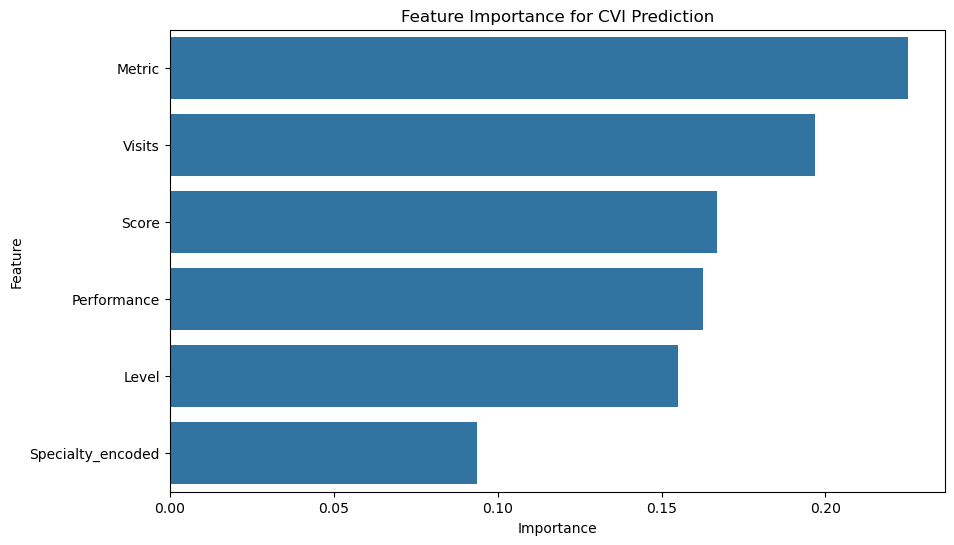


New Data Predictions:
      Specialty  Visits  Score  Level  Metric  Performance  Specialty_encoded  \
0    Neurology     120     70      2   30000            8                  2   
1  Orthopedics     150     65      3   50000            9                  4   

  CVI_Prediction  
0            Yes  
1            Yes  


In [37]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
file_path = r"D:\python\Pharma Dummy dataset\pharma_cvi_dataset.xlsx"
df = pd.read_excel(file_path)

# Step 3: Rename columns for clarity
df.columns = ["Doctor_ID", "Specialty", "Visits", "Score", "CVI_Status", "Level", "Metric", "Tier", "Performance"]

# Step 4: Encode categorical variables
le_specialty = LabelEncoder()
df['Specialty_encoded'] = le_specialty.fit_transform(df['Specialty'])

# Encode target variable
df['CVI_target'] = df['CVI_Status'].map({'Yes':1, 'No':0})

# Step 5: Select features and target
X = df[['Specialty_encoded', 'Visits', 'Score', 'Level', 'Metric', 'Performance']]
y = df['CVI_target']

# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 8: Predict on test set
y_pred = model.predict(X_test)

# Step 9: Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 10: Feature Importance
importance = model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance:\n", feat_imp_df)

# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance for CVI Prediction")
plt.show()

# Step 11: Predict new data
new_data = pd.DataFrame({
    'Specialty': ['Neurology', 'Orthopedics'],
    'Visits': [120, 150],
    'Score': [70, 65],
    'Level': [2, 3],
    'Metric': [30000, 50000],
    'Performance': [8, 9]
})

# Encode specialty
new_data['Specialty_encoded'] = le_specialty.transform(new_data['Specialty'])
X_new = new_data[['Specialty_encoded', 'Visits', 'Score', 'Level', 'Metric', 'Performance']]

# Predict and map to Yes/No
predictions = model.predict(X_new)
new_data['CVI_Prediction'] = np.where(predictions == 1, 'Yes', 'No')

print("\nNew Data Predictions:\n", new_data)


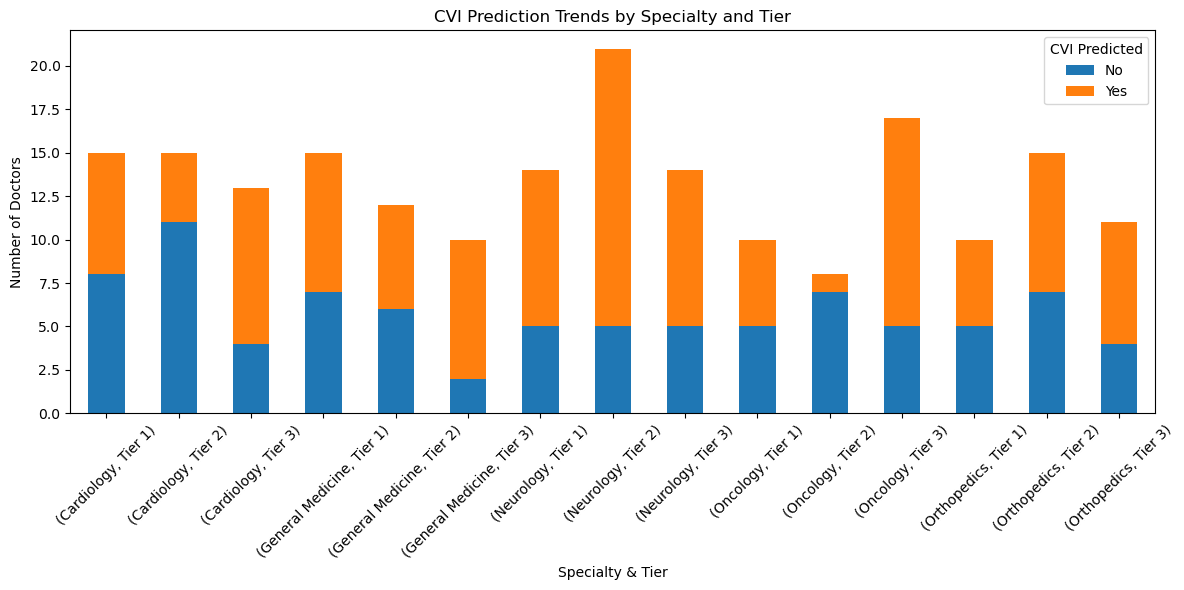

In [39]:
# Step 12: Visualize CVI Predictions by Specialty and Tier

# First, include predicted CVI for existing dataset (optional, using model)
df['CVI_Predicted'] = model.predict(X)
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted'] == 1, 'Yes', 'No')

# Group by Specialty and Tier
cvi_summary = df.groupby(['Specialty', 'Tier', 'CVI_Predicted_Label']).size().reset_index(name='Count')

# Pivot table for plotting
cvi_pivot = cvi_summary.pivot_table(index=['Specialty', 'Tier'], columns='CVI_Predicted_Label', values='Count', fill_value=0)

# Plot stacked bar chart
cvi_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("CVI Prediction Trends by Specialty and Tier")
plt.ylabel("Number of Doctors")
plt.xlabel("Specialty & Tier")
plt.xticks(rotation=45)
plt.legend(title='CVI Predicted')
plt.tight_layout()
plt.show()


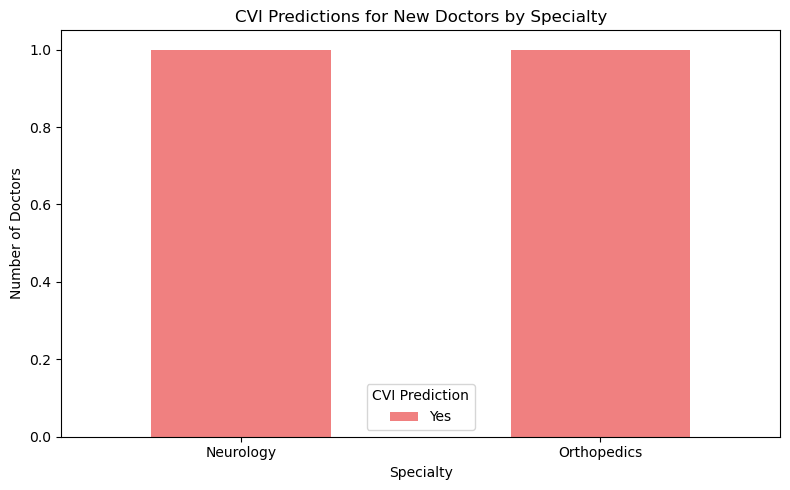

In [41]:
# Step 13: Visualize CVI Predictions for New Data

# Group new data by Specialty (and optionally Tier if you have it)
# In this example, Tier is not in new_data, so we use Specialty only
new_cvi_summary = new_data.groupby(['Specialty', 'CVI_Prediction']).size().reset_index(name='Count')

# Pivot table for plotting
new_cvi_pivot = new_cvi_summary.pivot(index='Specialty', columns='CVI_Prediction', values='Count').fillna(0)

# Plot stacked bar chart
new_cvi_pivot.plot(kind='bar', stacked=True, figsize=(8,5), color=['lightcoral', 'lightgreen'])
plt.title("CVI Predictions for New Doctors by Specialty")
plt.ylabel("Number of Doctors")
plt.xlabel("Specialty")
plt.xticks(rotation=0)
plt.legend(title='CVI Prediction')
plt.tight_layout()
plt.show()


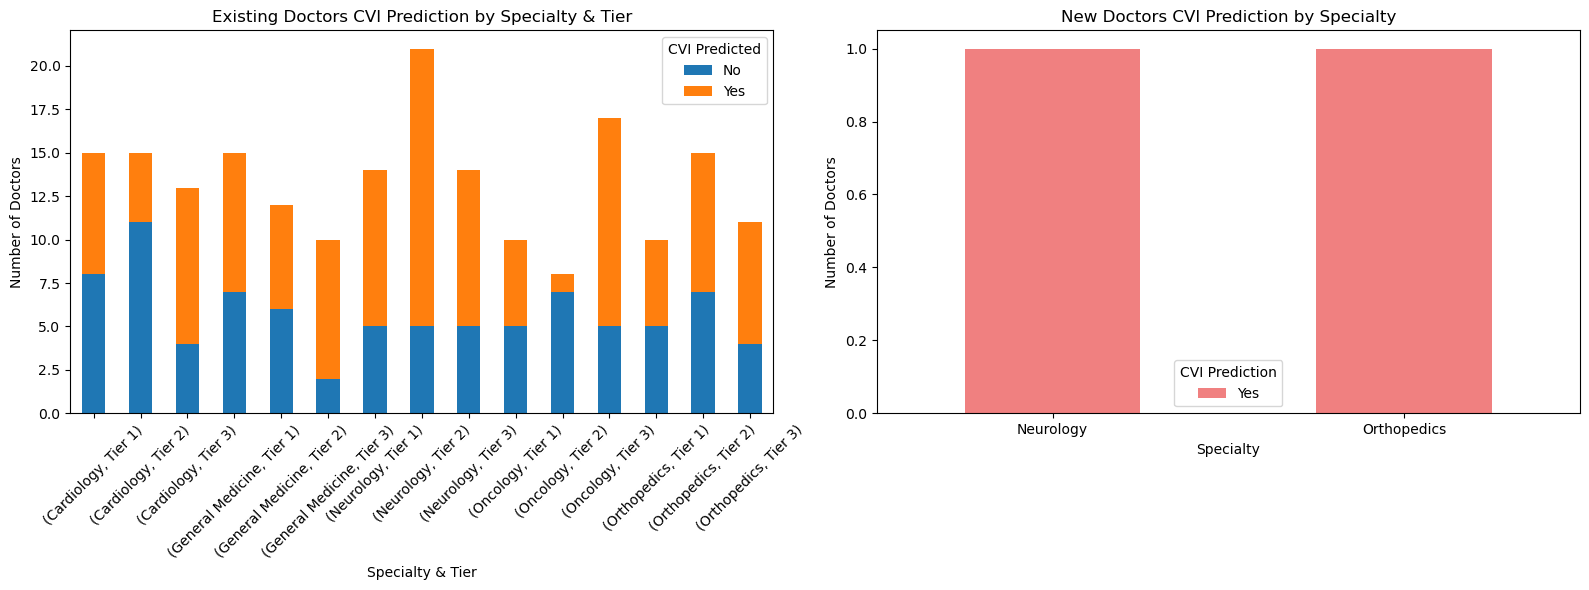

In [43]:
# Step 14: Combined Dashboard for CVI Trends

import matplotlib.pyplot as plt

# 1️⃣ Existing dataset visualization
df['CVI_Predicted'] = model.predict(X)
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted'] == 1, 'Yes', 'No')

existing_summary = df.groupby(['Specialty', 'Tier', 'CVI_Predicted_Label']).size().reset_index(name='Count')
existing_pivot = existing_summary.pivot_table(index=['Specialty', 'Tier'], columns='CVI_Predicted_Label', values='Count', fill_value=0)

# 2️⃣ New data visualization
new_cvi_summary = new_data.groupby(['Specialty', 'CVI_Prediction']).size().reset_index(name='Count')
new_pivot = new_cvi_summary.pivot(index='Specialty', columns='CVI_Prediction', values='Count').fillna(0)

# 3️⃣ Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Existing doctors plot
existing_pivot.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title("Existing Doctors CVI Prediction by Specialty & Tier")
axes[0].set_ylabel("Number of Doctors")
axes[0].set_xlabel("Specialty & Tier")
axes[0].legend(title='CVI Predicted')
axes[0].tick_params(axis='x', rotation=45)

# New doctors plot
new_pivot.plot(kind='bar', stacked=True, ax=axes[1], color=['lightcoral', 'lightgreen'])
axes[1].set_title("New Doctors CVI Prediction by Specialty")
axes[1].set_ylabel("Number of Doctors")
axes[1].set_xlabel("Specialty")
axes[1].legend(title='CVI Prediction')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


In [45]:
# Step 15: CVI Compliance Summary Table

# Calculate for existing doctors
existing_summary_table = df.groupby(['Specialty', 'Tier']).agg(
    Total_Doctors=('Doctor_ID', 'count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()

# Calculate percentage
existing_summary_table['CVI_Yes_Percent'] = (existing_summary_table['CVI_Yes'] / existing_summary_table['Total_Doctors'] * 100).round(2)

print("CVI Compliance Summary for Existing Doctors:\n")
print(existing_summary_table)

# Optional: calculate for new doctors as well
new_summary_table = new_data.groupby('Specialty').agg(
    Total_Doctors=('Specialty', 'count'),
    CVI_Yes=('CVI_Prediction', lambda x: (x=='Yes').sum())
).reset_index()

new_summary_table['CVI_Yes_Percent'] = (new_summary_table['CVI_Yes'] / new_summary_table['Total_Doctors'] * 100).round(2)

print("\nCVI Compliance Summary for New Doctors:\n")
print(new_summary_table)


CVI Compliance Summary for Existing Doctors:

           Specialty    Tier  Total_Doctors  CVI_Yes  CVI_Yes_Percent
0         Cardiology  Tier 1             15        7            46.67
1         Cardiology  Tier 2             15        4            26.67
2         Cardiology  Tier 3             13        9            69.23
3   General Medicine  Tier 1             15        8            53.33
4   General Medicine  Tier 2             12        6            50.00
5   General Medicine  Tier 3             10        8            80.00
6          Neurology  Tier 1             14        9            64.29
7          Neurology  Tier 2             21       16            76.19
8          Neurology  Tier 3             14        9            64.29
9           Oncology  Tier 1             10        5            50.00
10          Oncology  Tier 2              8        1            12.50
11          Oncology  Tier 3             17       12            70.59
12       Orthopedics  Tier 1             10 

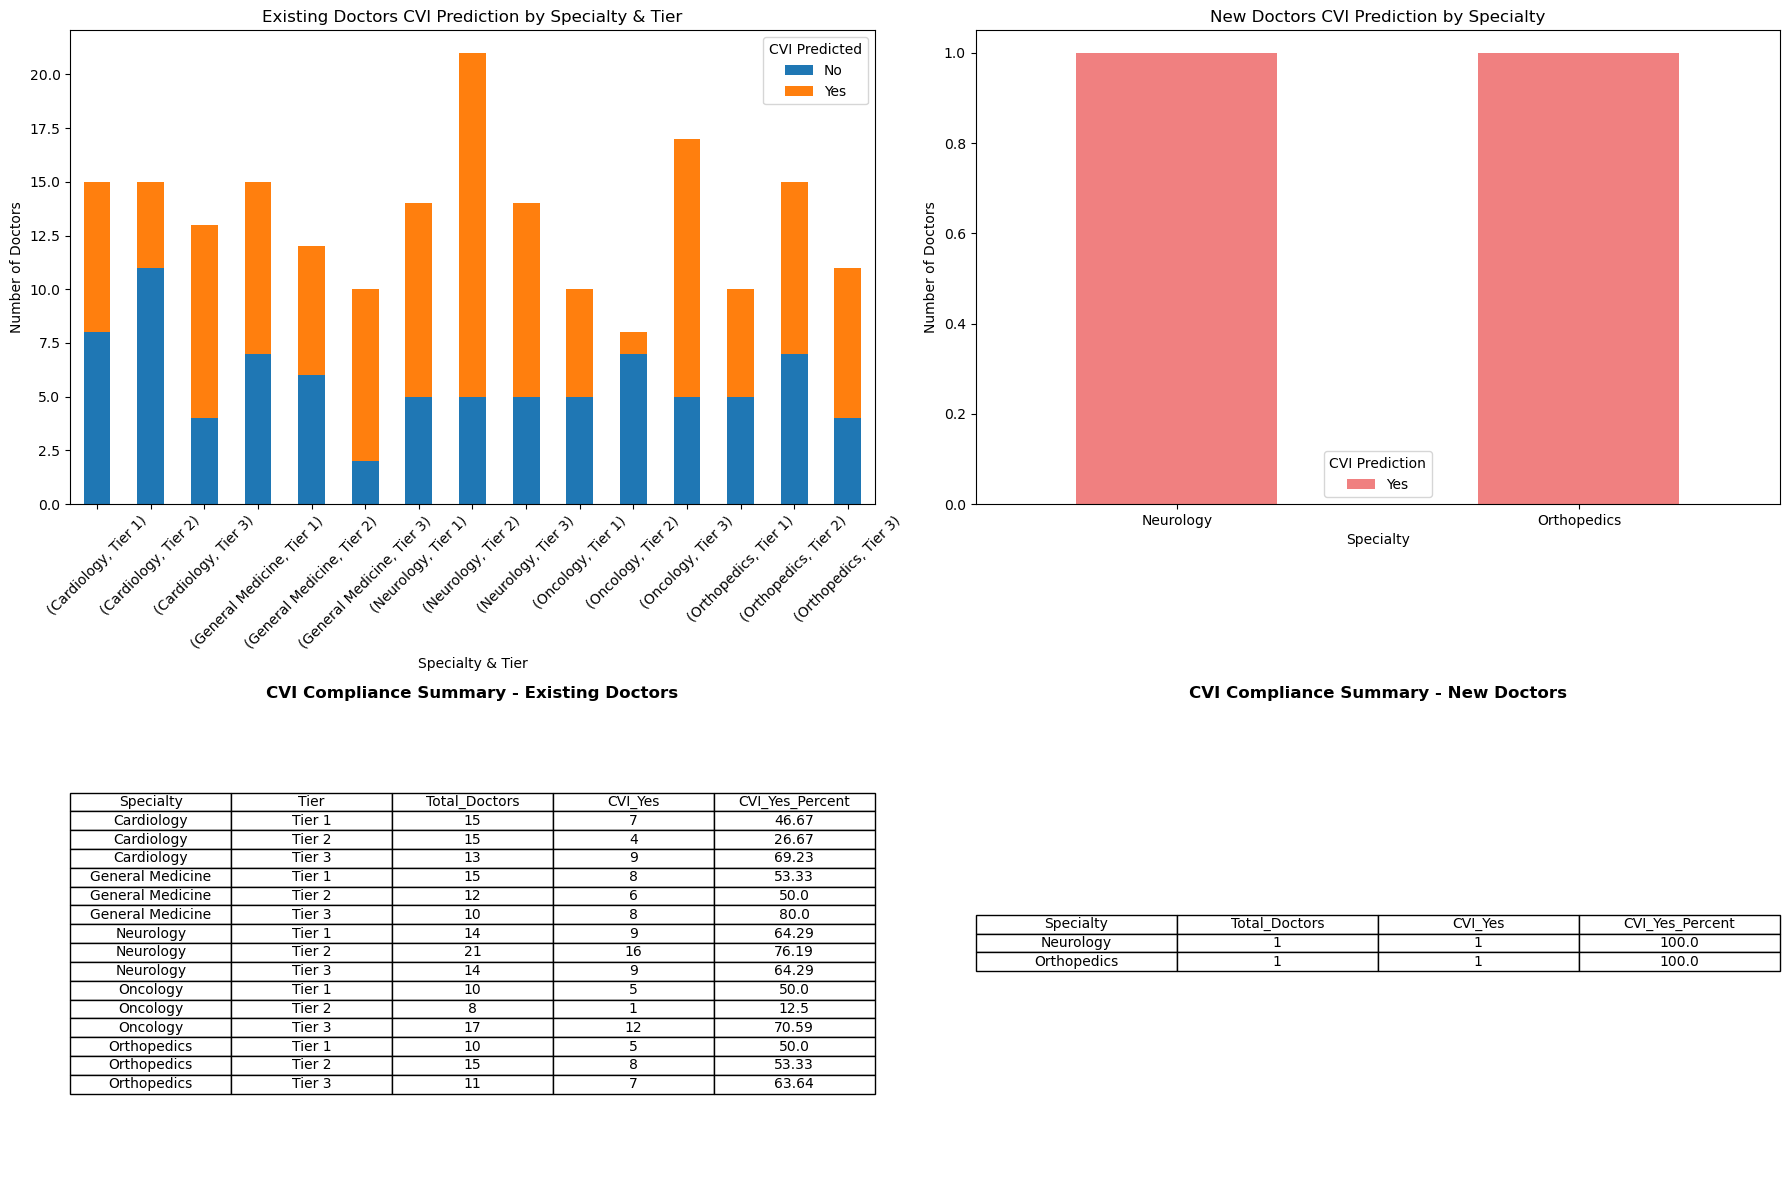

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Step 1: Prepare existing doctors data ---
df['CVI_Predicted'] = model.predict(X)
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted'] == 1, 'Yes', 'No')

existing_summary = df.groupby(['Specialty', 'Tier', 'CVI_Predicted_Label']).size().reset_index(name='Count')
existing_pivot = existing_summary.pivot_table(index=['Specialty', 'Tier'], columns='CVI_Predicted_Label', values='Count', fill_value=0)

existing_summary_table = df.groupby(['Specialty', 'Tier']).agg(
    Total_Doctors=('Doctor_ID', 'count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()
existing_summary_table['CVI_Yes_Percent'] = (existing_summary_table['CVI_Yes'] / existing_summary_table['Total_Doctors'] * 100).round(2)

# --- Step 2: Prepare new doctors data ---
new_data['Specialty_encoded'] = le_specialty.transform(new_data['Specialty'])
X_new = new_data[['Specialty_encoded', 'Visits', 'Score', 'Level', 'Metric', 'Performance']]
predictions = model.predict(X_new)
new_data['CVI_Prediction'] = np.where(predictions == 1, 'Yes', 'No')

new_cvi_summary = new_data.groupby(['Specialty', 'CVI_Prediction']).size().reset_index(name='Count')
new_pivot = new_cvi_summary.pivot(index='Specialty', columns='CVI_Prediction', values='Count').fillna(0)

new_summary_table = new_data.groupby('Specialty').agg(
    Total_Doctors=('Specialty', 'count'),
    CVI_Yes=('CVI_Prediction', lambda x: (x=='Yes').sum())
).reset_index()
new_summary_table['CVI_Yes_Percent'] = (new_summary_table['CVI_Yes'] / new_summary_table['Total_Doctors'] * 100).round(2)

# --- Step 3: Create dashboard layout ---
fig, axes = plt.subplots(2, 2, figsize=(18,12))

# Existing doctors stacked bar chart
existing_pivot.plot(kind='bar', stacked=True, ax=axes[0,0])
axes[0,0].set_title("Existing Doctors CVI Prediction by Specialty & Tier")
axes[0,0].set_ylabel("Number of Doctors")
axes[0,0].set_xlabel("Specialty & Tier")
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(title='CVI Predicted')

# New doctors stacked bar chart
new_pivot.plot(kind='bar', stacked=True, ax=axes[0,1], color=['lightcoral', 'lightgreen'])
axes[0,1].set_title("New Doctors CVI Prediction by Specialty")
axes[0,1].set_ylabel("Number of Doctors")
axes[0,1].set_xlabel("Specialty")
axes[0,1].tick_params(axis='x', rotation=0)
axes[0,1].legend(title='CVI Prediction')

# Existing doctors summary table
axes[1,0].axis('off')
table1 = axes[1,0].table(cellText=existing_summary_table.values,
                          colLabels=existing_summary_table.columns,
                          cellLoc='center',
                          loc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(10)
axes[1,0].set_title("CVI Compliance Summary - Existing Doctors", fontweight='bold')

# New doctors summary table
axes[1,1].axis('off')
table2 = axes[1,1].table(cellText=new_summary_table.values,
                          colLabels=new_summary_table.columns,
                          cellLoc='center',
                          loc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(10)
axes[1,1].set_title("CVI Compliance Summary - New Doctors", fontweight='bold')

plt.tight_layout()
plt.show()


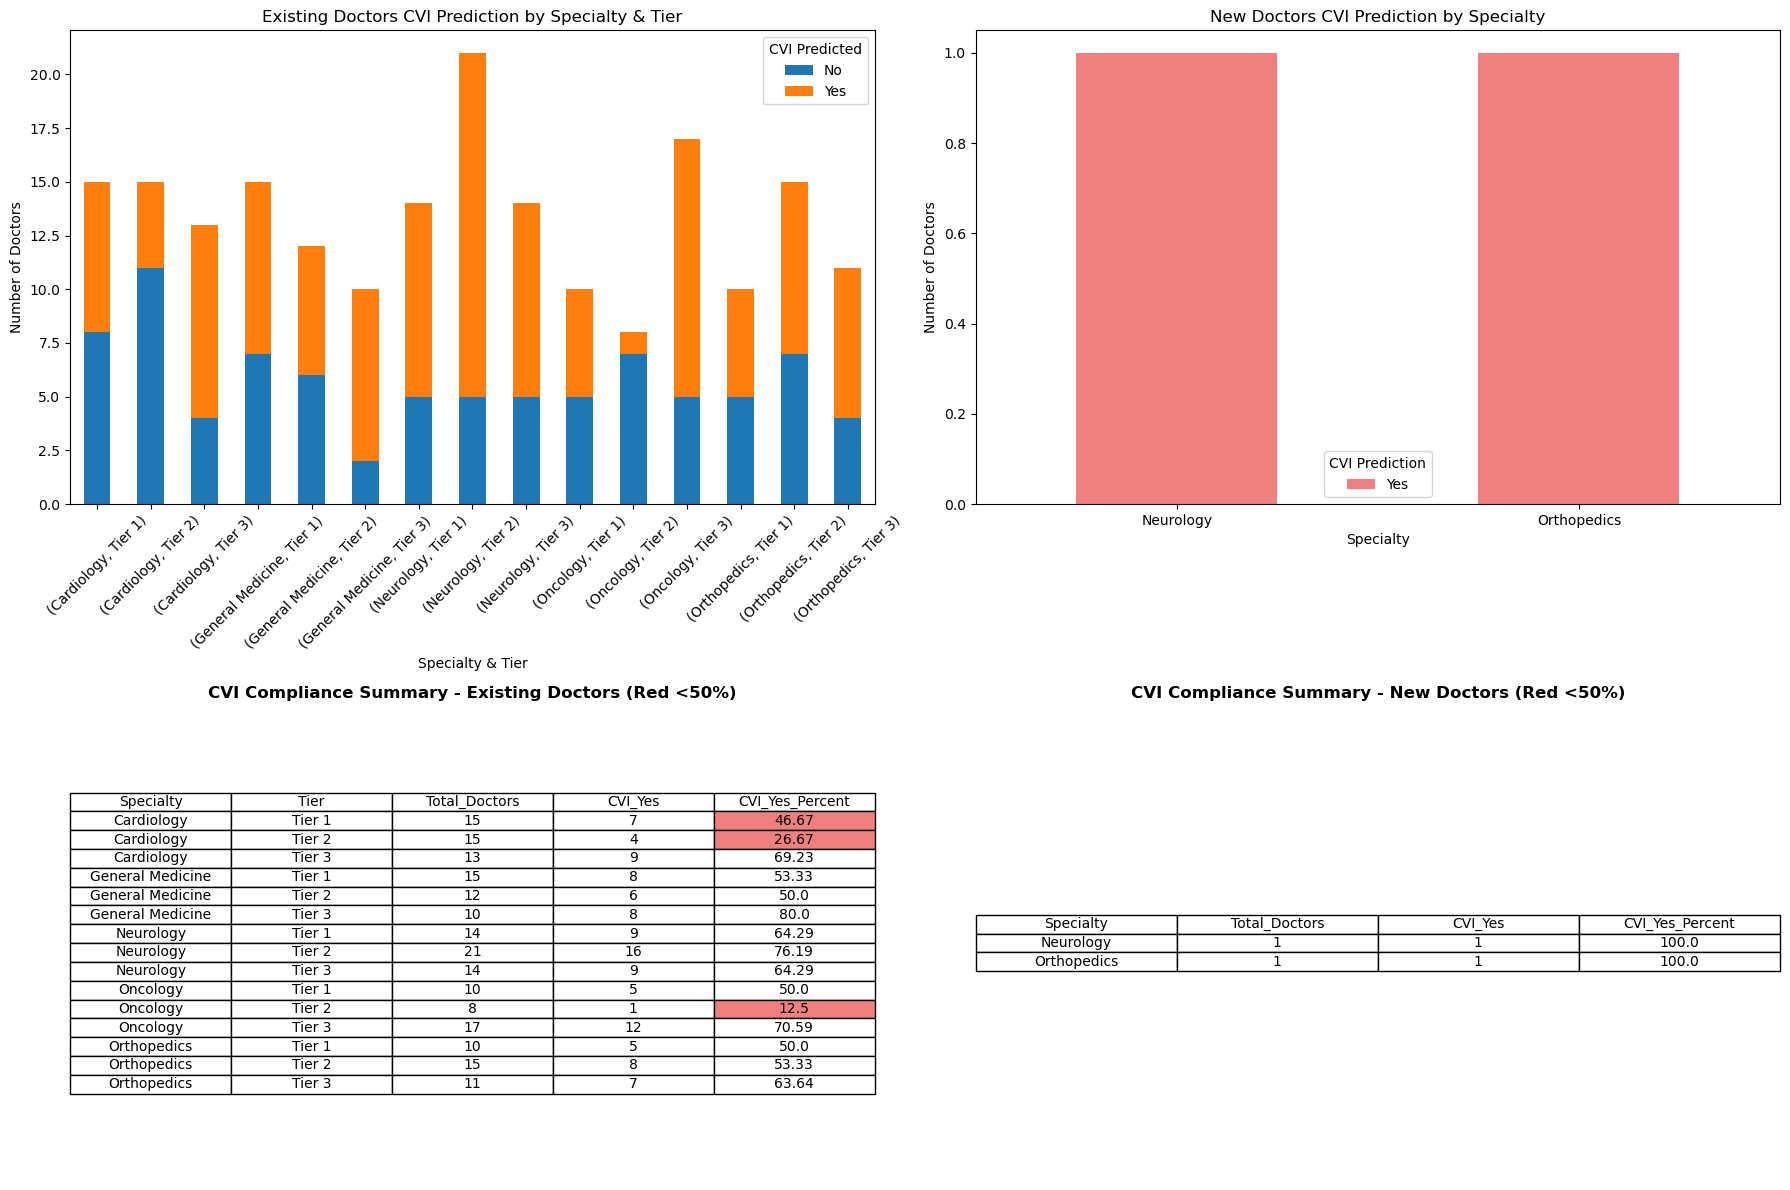

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Step 1: Prepare existing doctors data ---
df['CVI_Predicted'] = model.predict(X)
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted'] == 1, 'Yes', 'No')

existing_summary = df.groupby(['Specialty', 'Tier', 'CVI_Predicted_Label']).size().reset_index(name='Count')
existing_pivot = existing_summary.pivot_table(index=['Specialty', 'Tier'], columns='CVI_Predicted_Label', values='Count', fill_value=0)

existing_summary_table = df.groupby(['Specialty', 'Tier']).agg(
    Total_Doctors=('Doctor_ID', 'count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()
existing_summary_table['CVI_Yes_Percent'] = (existing_summary_table['CVI_Yes'] / existing_summary_table['Total_Doctors'] * 100).round(2)

# --- Step 2: Prepare new doctors data ---
new_data['Specialty_encoded'] = le_specialty.transform(new_data['Specialty'])
X_new = new_data[['Specialty_encoded', 'Visits', 'Score', 'Level', 'Metric', 'Performance']]
predictions = model.predict(X_new)
new_data['CVI_Prediction'] = np.where(predictions == 1, 'Yes', 'No')

new_cvi_summary = new_data.groupby(['Specialty', 'CVI_Prediction']).size().reset_index(name='Count')
new_pivot = new_cvi_summary.pivot(index='Specialty', columns='CVI_Prediction', values='Count').fillna(0)

new_summary_table = new_data.groupby('Specialty').agg(
    Total_Doctors=('Specialty', 'count'),
    CVI_Yes=('CVI_Prediction', lambda x: (x=='Yes').sum())
).reset_index()
new_summary_table['CVI_Yes_Percent'] = (new_summary_table['CVI_Yes'] / new_summary_table['Total_Doctors'] * 100).round(2)

# --- Step 3: Create dashboard layout ---
fig, axes = plt.subplots(2, 2, figsize=(18,12))

# Existing doctors stacked bar chart
existing_pivot.plot(kind='bar', stacked=True, ax=axes[0,0])
axes[0,0].set_title("Existing Doctors CVI Prediction by Specialty & Tier")
axes[0,0].set_ylabel("Number of Doctors")
axes[0,0].set_xlabel("Specialty & Tier")
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(title='CVI Predicted')

# New doctors stacked bar chart
new_pivot.plot(kind='bar', stacked=True, ax=axes[0,1], color=['lightcoral', 'lightgreen'])
axes[0,1].set_title("New Doctors CVI Prediction by Specialty")
axes[0,1].set_ylabel("Number of Doctors")
axes[0,1].set_xlabel("Specialty")
axes[0,1].tick_params(axis='x', rotation=0)
axes[0,1].legend(title='CVI Prediction')

# Existing doctors summary table with highlighting
axes[1,0].axis('off')
cell_colors = [['lightcoral' if col_name == 'CVI_Yes_Percent' and val < 50 else 'white' for col_name, val in zip(existing_summary_table.columns, row)] for row in existing_summary_table.values]
table1 = axes[1,0].table(cellText=existing_summary_table.values,
                          colLabels=existing_summary_table.columns,
                          cellColours=cell_colors,
                          cellLoc='center',
                          loc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(10)
axes[1,0].set_title("CVI Compliance Summary - Existing Doctors (Red <50%)", fontweight='bold')

# New doctors summary table with highlighting
axes[1,1].axis('off')
cell_colors_new = [['lightcoral' if col_name == 'CVI_Yes_Percent' and val < 50 else 'white' for col_name, val in zip(new_summary_table.columns, row)] for row in new_summary_table.values]
table2 = axes[1,1].table(cellText=new_summary_table.values,
                          colLabels=new_summary_table.columns,
                          cellColours=cell_colors_new,
                          cellLoc='center',
                          loc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(10)
axes[1,1].set_title("CVI Compliance Summary - New Doctors (Red <50%)", fontweight='bold')

plt.tight_layout()
plt.show()


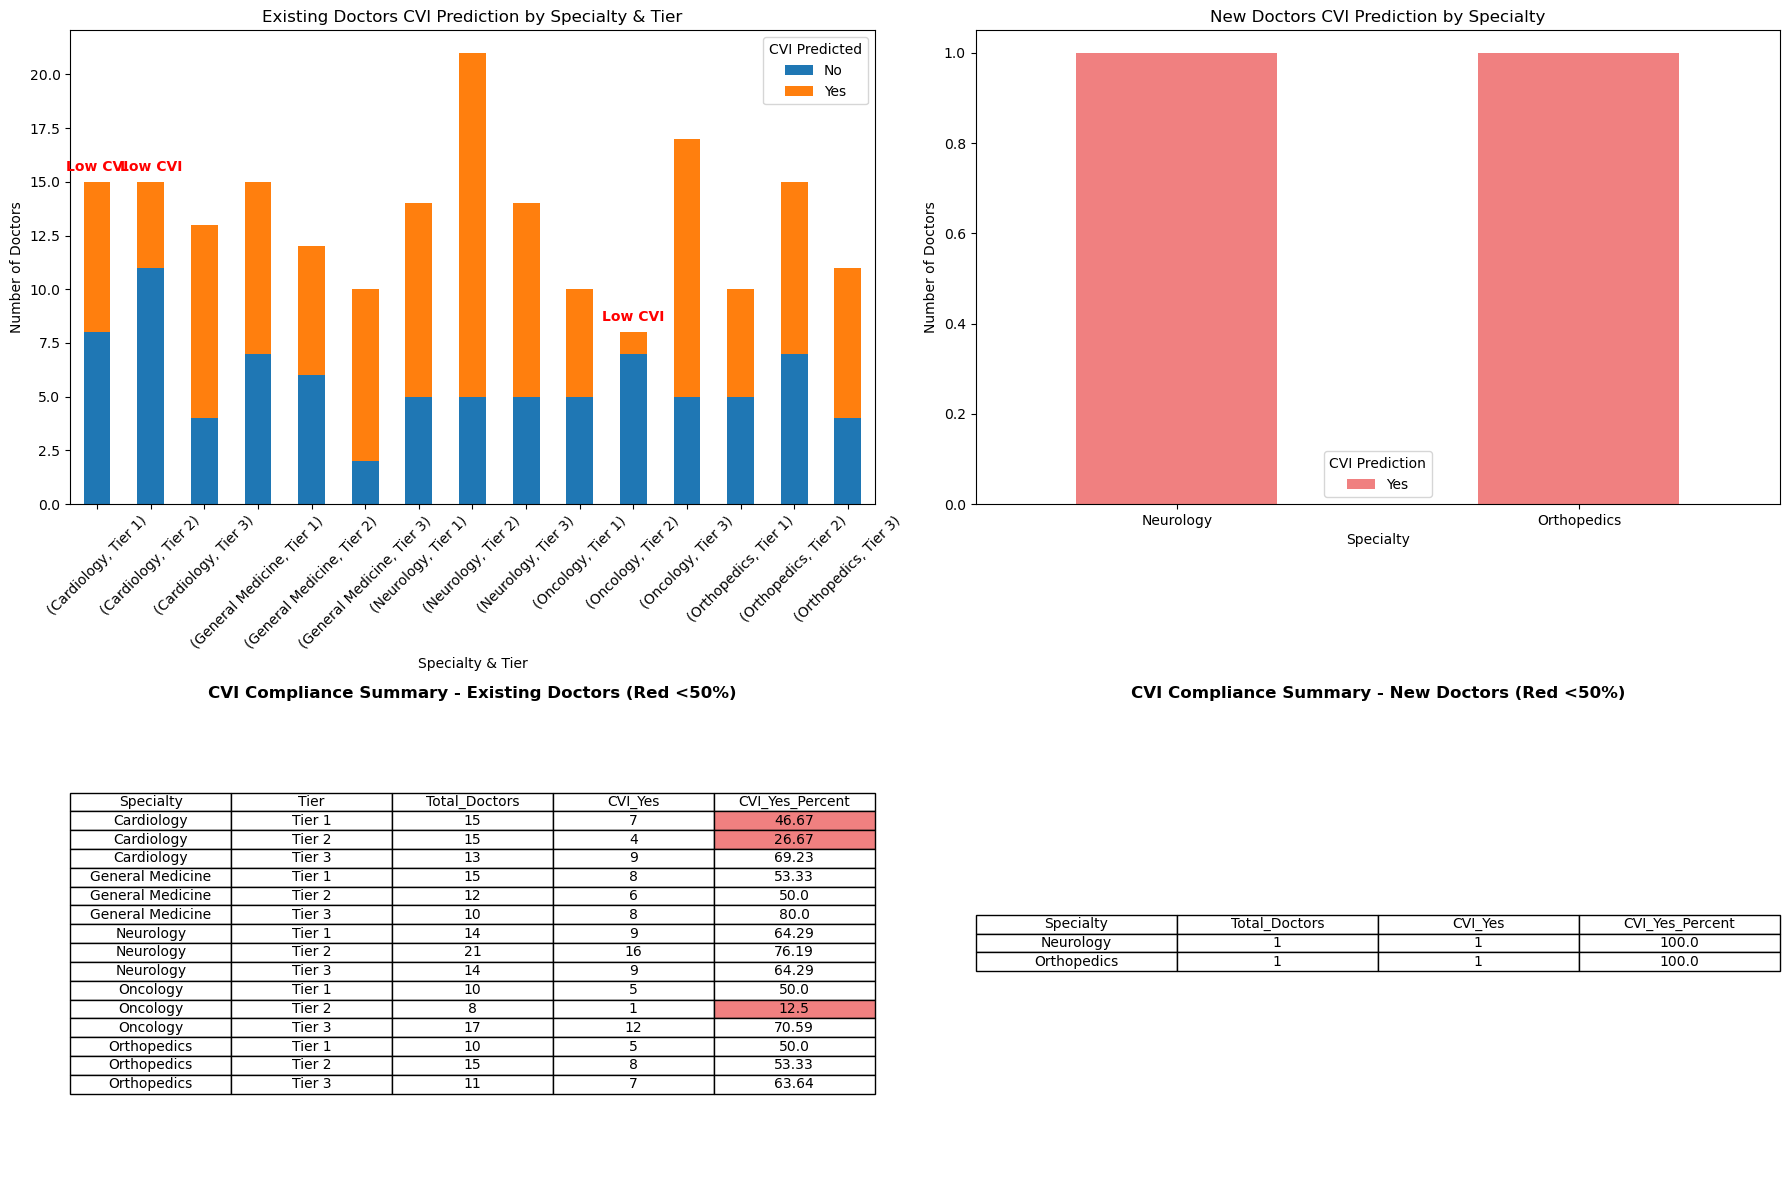

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Step 1: Prepare existing doctors data ---
df['CVI_Predicted'] = model.predict(X)
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted'] == 1, 'Yes', 'No')

existing_summary = df.groupby(['Specialty', 'Tier', 'CVI_Predicted_Label']).size().reset_index(name='Count')
existing_pivot = existing_summary.pivot_table(index=['Specialty', 'Tier'], columns='CVI_Predicted_Label', values='Count', fill_value=0)

existing_summary_table = df.groupby(['Specialty', 'Tier']).agg(
    Total_Doctors=('Doctor_ID', 'count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()
existing_summary_table['CVI_Yes_Percent'] = (existing_summary_table['CVI_Yes'] / existing_summary_table['Total_Doctors'] * 100).round(2)

# --- Step 2: Prepare new doctors data ---
new_data['Specialty_encoded'] = le_specialty.transform(new_data['Specialty'])
X_new = new_data[['Specialty_encoded', 'Visits', 'Score', 'Level', 'Metric', 'Performance']]
predictions = model.predict(X_new)
new_data['CVI_Prediction'] = np.where(predictions == 1, 'Yes', 'No')

new_cvi_summary = new_data.groupby(['Specialty', 'CVI_Prediction']).size().reset_index(name='Count')
new_pivot = new_cvi_summary.pivot(index='Specialty', columns='CVI_Prediction', values='Count').fillna(0)

new_summary_table = new_data.groupby('Specialty').agg(
    Total_Doctors=('Specialty', 'count'),
    CVI_Yes=('CVI_Prediction', lambda x: (x=='Yes').sum())
).reset_index()
new_summary_table['CVI_Yes_Percent'] = (new_summary_table['CVI_Yes'] / new_summary_table['Total_Doctors'] * 100).round(2)

# --- Step 3: Create dashboard layout ---
fig, axes = plt.subplots(2, 2, figsize=(18,12))

# Existing doctors stacked bar chart
existing_pivot.plot(kind='bar', stacked=True, ax=axes[0,0])
axes[0,0].set_title("Existing Doctors CVI Prediction by Specialty & Tier")
axes[0,0].set_ylabel("Number of Doctors")
axes[0,0].set_xlabel("Specialty & Tier")
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(title='CVI Predicted')

# Annotate low-performing groups (<50%)
for i, idx in enumerate(existing_pivot.index):
    total = existing_pivot.loc[idx].sum()
    yes_count = existing_pivot.loc[idx].get('Yes', 0)
    if total > 0 and (yes_count / total) * 100 < 50:
        axes[0,0].text(i, total + 0.5, "Low CVI", color='red', fontweight='bold', ha='center')

# New doctors stacked bar chart
new_pivot.plot(kind='bar', stacked=True, ax=axes[0,1], color=['lightcoral', 'lightgreen'])
axes[0,1].set_title("New Doctors CVI Prediction by Specialty")
axes[0,1].set_ylabel("Number of Doctors")
axes[0,1].set_xlabel("Specialty")
axes[0,1].tick_params(axis='x', rotation=0)
axes[0,1].legend(title='CVI Prediction')

# Annotate low-performing new doctors
for i, idx in enumerate(new_pivot.index):
    total = new_pivot.loc[idx].sum()
    yes_count = new_pivot.loc[idx].get('Yes', 0)
    if total > 0 and (yes_count / total) * 100 < 50:
        axes[0,1].text(i, total + 0.5, "Low CVI", color='red', fontweight='bold', ha='center')

# Existing doctors summary table with highlighting
axes[1,0].axis('off')
cell_colors = [['lightcoral' if col_name == 'CVI_Yes_Percent' and val < 50 else 'white' for col_name, val in zip(existing_summary_table.columns, row)] for row in existing_summary_table.values]
table1 = axes[1,0].table(cellText=existing_summary_table.values,
                          colLabels=existing_summary_table.columns,
                          cellColours=cell_colors,
                          cellLoc='center',
                          loc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(10)
axes[1,0].set_title("CVI Compliance Summary - Existing Doctors (Red <50%)", fontweight='bold')

# New doctors summary table with highlighting
axes[1,1].axis('off')
cell_colors_new = [['lightcoral' if col_name == 'CVI_Yes_Percent' and val < 50 else 'white' for col_name, val in zip(new_summary_table.columns, row)] for row in new_summary_table.values]
table2 = axes[1,1].table(cellText=new_summary_table.values,
                          colLabels=new_summary_table.columns,
                          cellColours=cell_colors_new,
                          cellLoc='center',
                          loc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(10)
axes[1,1].set_title("CVI Compliance Summary - New Doctors (Red <50%)", fontweight='bold')

plt.tight_layout()
plt.show()


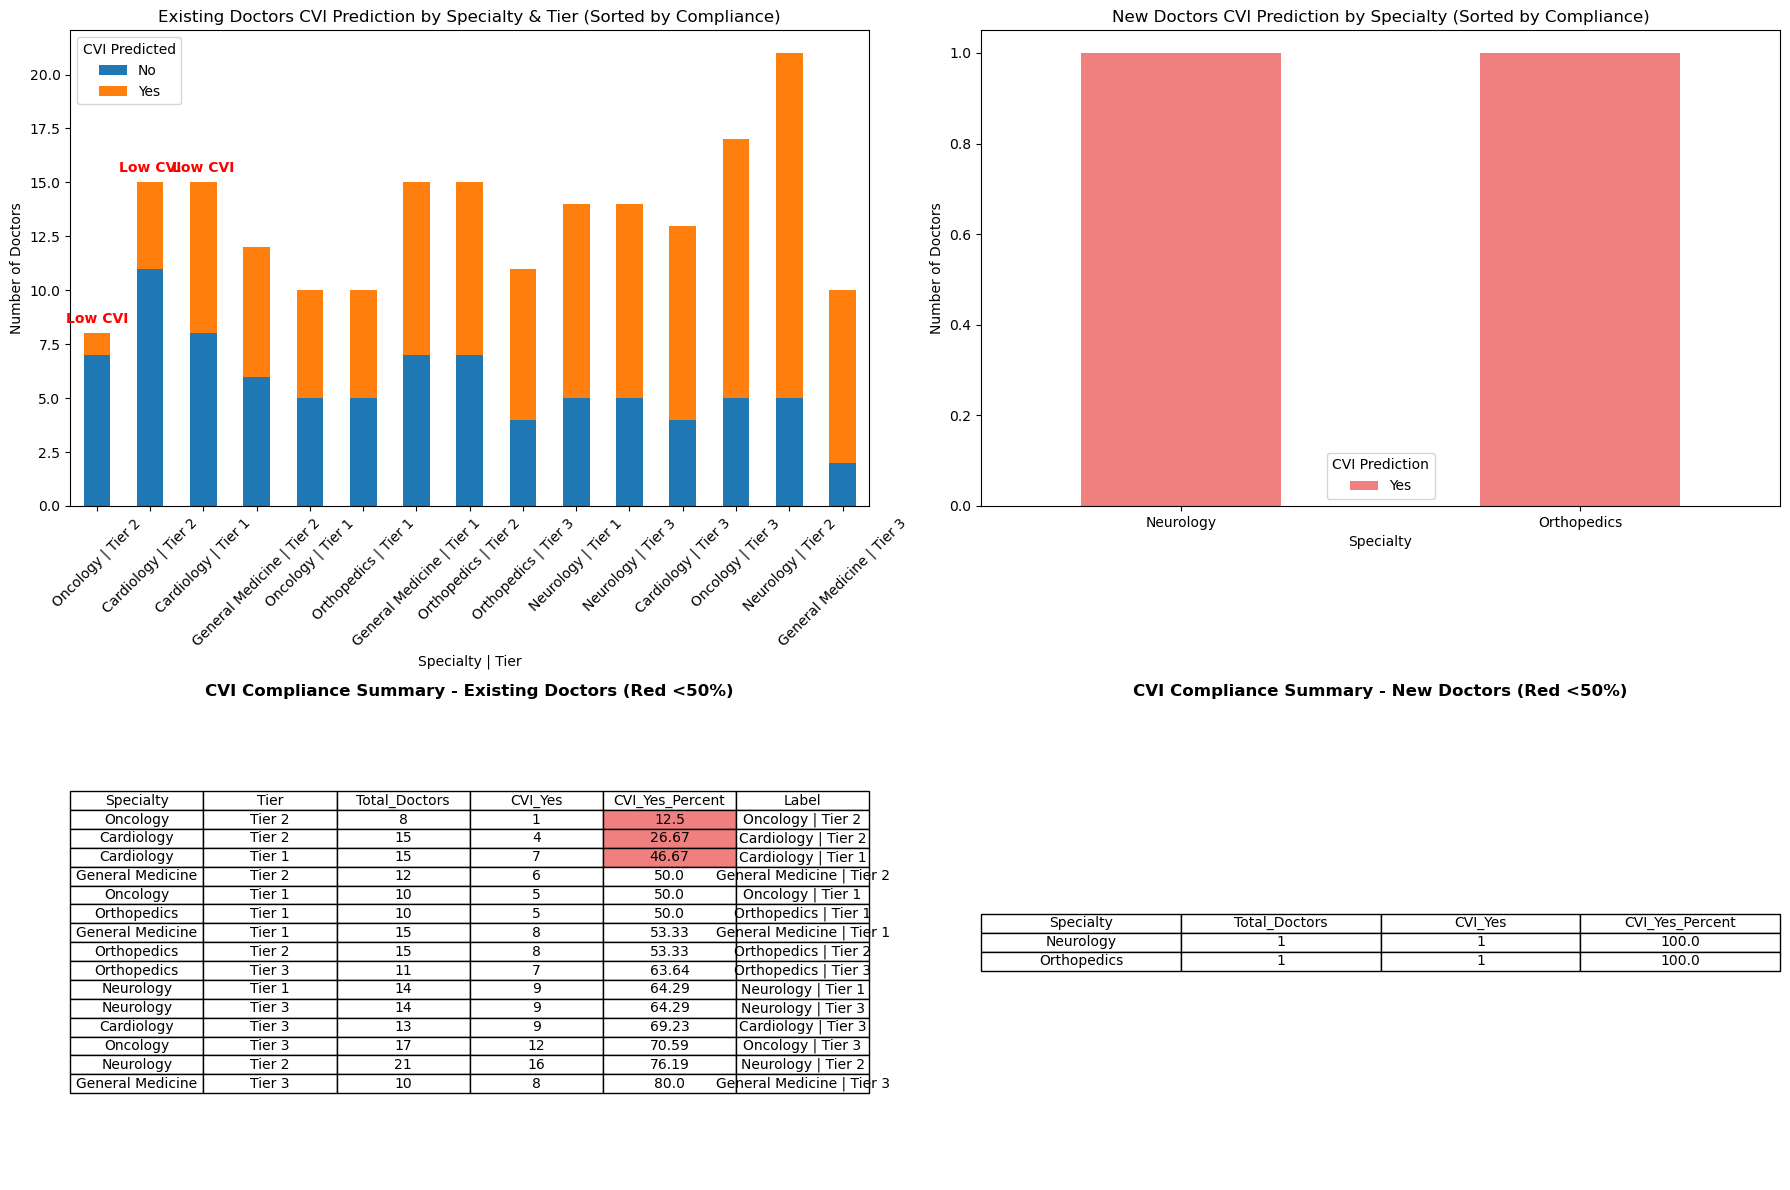

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Step 1: Prepare existing doctors data ---
df['CVI_Predicted'] = model.predict(X)
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted'] == 1, 'Yes', 'No')

# Summary and pivot table
existing_summary_table = df.groupby(['Specialty', 'Tier']).agg(
    Total_Doctors=('Doctor_ID', 'count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()
existing_summary_table['CVI_Yes_Percent'] = (existing_summary_table['CVI_Yes'] / existing_summary_table['Total_Doctors'] * 100).round(2)

# Sort by CVI compliance ascending
existing_summary_table = existing_summary_table.sort_values('CVI_Yes_Percent')
existing_summary_table['Label'] = existing_summary_table['Specialty'] + " | " + existing_summary_table['Tier']

# Pivot for plotting
existing_pivot = df.groupby(['Specialty', 'Tier', 'CVI_Predicted_Label']).size().reset_index(name='Count')
existing_pivot['Label'] = existing_pivot['Specialty'] + " | " + existing_pivot['Tier']
existing_pivot = existing_pivot.pivot_table(index='Label', columns='CVI_Predicted_Label', values='Count', fill_value=0)
existing_pivot = existing_pivot.reindex(existing_summary_table['Label'])  # ensure same sorted order

# --- Step 2: Prepare new doctors data ---
new_data['Specialty_encoded'] = le_specialty.transform(new_data['Specialty'])
X_new = new_data[['Specialty_encoded', 'Visits', 'Score', 'Level', 'Metric', 'Performance']]
predictions = model.predict(X_new)
new_data['CVI_Prediction'] = np.where(predictions == 1, 'Yes', 'No')

new_summary_table = new_data.groupby('Specialty').agg(
    Total_Doctors=('Specialty', 'count'),
    CVI_Yes=('CVI_Prediction', lambda x: (x=='Yes').sum())
).reset_index()
new_summary_table['CVI_Yes_Percent'] = (new_summary_table['CVI_Yes'] / new_summary_table['Total_Doctors'] * 100).round(2)

# Sort new doctors by compliance ascending
new_summary_table = new_summary_table.sort_values('CVI_Yes_Percent')
new_pivot = new_data.groupby(['Specialty', 'CVI_Prediction']).size().reset_index(name='Count')
new_pivot = new_pivot.pivot(index='Specialty', columns='CVI_Prediction', values='Count').fillna(0)
new_pivot = new_pivot.reindex(new_summary_table['Specialty'])

# --- Step 3: Create dashboard layout ---
fig, axes = plt.subplots(2, 2, figsize=(18,12))

# Existing doctors stacked bar chart
existing_pivot.plot(kind='bar', stacked=True, ax=axes[0,0])
axes[0,0].set_title("Existing Doctors CVI Prediction by Specialty & Tier (Sorted by Compliance)")
axes[0,0].set_ylabel("Number of Doctors")
axes[0,0].set_xlabel("Specialty | Tier")
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(title='CVI Predicted')

# Annotate low-performing groups (<50%)
for i, idx in enumerate(existing_pivot.index):
    total = existing_pivot.loc[idx].sum()
    yes_count = existing_pivot.loc[idx].get('Yes', 0)
    if total > 0 and (yes_count / total) * 100 < 50:
        axes[0,0].text(i, total + 0.5, "Low CVI", color='red', fontweight='bold', ha='center')

# New doctors stacked bar chart
new_pivot.plot(kind='bar', stacked=True, ax=axes[0,1], color=['lightcoral', 'lightgreen'])
axes[0,1].set_title("New Doctors CVI Prediction by Specialty (Sorted by Compliance)")
axes[0,1].set_ylabel("Number of Doctors")
axes[0,1].set_xlabel("Specialty")
axes[0,1].tick_params(axis='x', rotation=0)
axes[0,1].legend(title='CVI Prediction')

# Annotate low-performing new doctors
for i, idx in enumerate(new_pivot.index):
    total = new_pivot.loc[idx].sum()
    yes_count = new_pivot.loc[idx].get('Yes', 0)
    if total > 0 and (yes_count / total) * 100 < 50:
        axes[0,1].text(i, total + 0.5, "Low CVI", color='red', fontweight='bold', ha='center')

# Existing doctors summary table with highlighting
axes[1,0].axis('off')
cell_colors = [['lightcoral' if col_name == 'CVI_Yes_Percent' and val < 50 else 'white'
                for col_name, val in zip(existing_summary_table.columns, row)] for row in existing_summary_table.values]
table1 = axes[1,0].table(cellText=existing_summary_table.values,
                          colLabels=existing_summary_table.columns,
                          cellColours=cell_colors,
                          cellLoc='center',
                          loc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(10)
axes[1,0].set_title("CVI Compliance Summary - Existing Doctors (Red <50%)", fontweight='bold')

# New doctors summary table with highlighting
axes[1,1].axis('off')
cell_colors_new = [['lightcoral' if col_name == 'CVI_Yes_Percent' and val < 50 else 'white'
                    for col_name, val in zip(new_summary_table.columns, row)] for row in new_summary_table.values]
table2 = axes[1,1].table(cellText=new_summary_table.values,
                          colLabels=new_summary_table.columns,
                          cellColours=cell_colors_new,
                          cellLoc='center',
                          loc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(10)
axes[1,1].set_title("CVI Compliance Summary - New Doctors (Red <50%)", fontweight='bold')

plt.tight_layout()
plt.show()


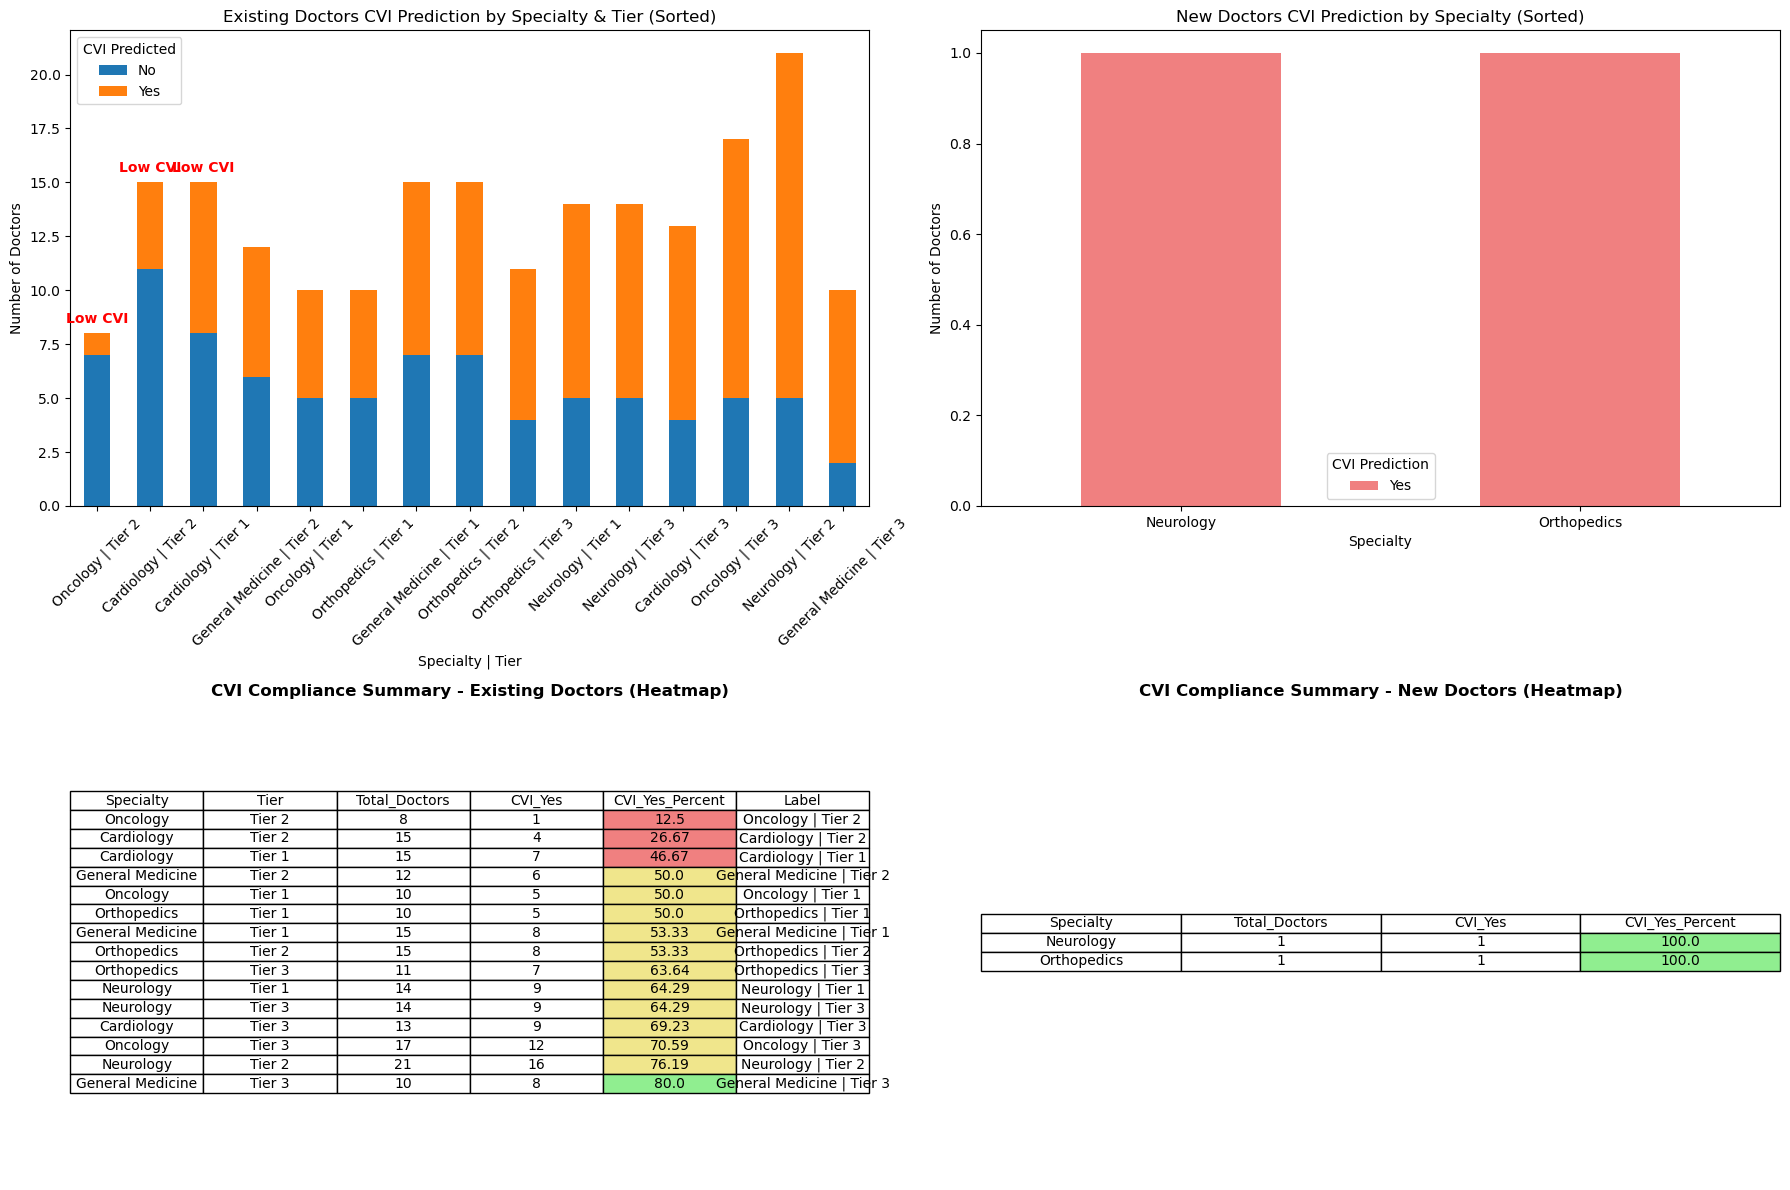

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Step 1: Prepare existing doctors data ---
df['CVI_Predicted'] = model.predict(X)
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted'] == 1, 'Yes', 'No')

existing_summary_table = df.groupby(['Specialty', 'Tier']).agg(
    Total_Doctors=('Doctor_ID', 'count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()
existing_summary_table['CVI_Yes_Percent'] = (existing_summary_table['CVI_Yes'] / existing_summary_table['Total_Doctors'] * 100).round(2)
existing_summary_table = existing_summary_table.sort_values('CVI_Yes_Percent')
existing_summary_table['Label'] = existing_summary_table['Specialty'] + " | " + existing_summary_table['Tier']

existing_pivot = df.groupby(['Specialty', 'Tier', 'CVI_Predicted_Label']).size().reset_index(name='Count')
existing_pivot['Label'] = existing_pivot['Specialty'] + " | " + existing_pivot['Tier']
existing_pivot = existing_pivot.pivot_table(index='Label', columns='CVI_Predicted_Label', values='Count', fill_value=0)
existing_pivot = existing_pivot.reindex(existing_summary_table['Label'])

# --- Step 2: Prepare new doctors data ---
new_data['Specialty_encoded'] = le_specialty.transform(new_data['Specialty'])
X_new = new_data[['Specialty_encoded', 'Visits', 'Score', 'Level', 'Metric', 'Performance']]
predictions = model.predict(X_new)
new_data['CVI_Prediction'] = np.where(predictions == 1, 'Yes', 'No')

new_summary_table = new_data.groupby('Specialty').agg(
    Total_Doctors=('Specialty', 'count'),
    CVI_Yes=('CVI_Prediction', lambda x: (x=='Yes').sum())
).reset_index()
new_summary_table['CVI_Yes_Percent'] = (new_summary_table['CVI_Yes'] / new_summary_table['Total_Doctors'] * 100).round(2)
new_summary_table = new_summary_table.sort_values('CVI_Yes_Percent')

new_pivot = new_data.groupby(['Specialty', 'CVI_Prediction']).size().reset_index(name='Count')
new_pivot = new_pivot.pivot(index='Specialty', columns='CVI_Prediction', values='Count').fillna(0)
new_pivot = new_pivot.reindex(new_summary_table['Specialty'])

# --- Step 3: Define function for heatmap coloring ---
def compliance_color(val):
    if val < 50:
        return 'lightcoral'   # red
    elif val < 80:
        return 'khaki'        # yellow
    else:
        return 'lightgreen'   # green

# --- Step 4: Create dashboard layout ---
fig, axes = plt.subplots(2, 2, figsize=(18,12))

# Existing doctors stacked bar chart
existing_pivot.plot(kind='bar', stacked=True, ax=axes[0,0])
axes[0,0].set_title("Existing Doctors CVI Prediction by Specialty & Tier (Sorted)")
axes[0,0].set_ylabel("Number of Doctors")
axes[0,0].set_xlabel("Specialty | Tier")
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(title='CVI Predicted')
for i, idx in enumerate(existing_pivot.index):
    total = existing_pivot.loc[idx].sum()
    yes_count = existing_pivot.loc[idx].get('Yes', 0)
    if total > 0 and (yes_count / total) * 100 < 50:
        axes[0,0].text(i, total + 0.5, "Low CVI", color='red', fontweight='bold', ha='center')

# New doctors stacked bar chart
new_pivot.plot(kind='bar', stacked=True, ax=axes[0,1], color=['lightcoral', 'lightgreen'])
axes[0,1].set_title("New Doctors CVI Prediction by Specialty (Sorted)")
axes[0,1].set_ylabel("Number of Doctors")
axes[0,1].set_xlabel("Specialty")
axes[0,1].tick_params(axis='x', rotation=0)
axes[0,1].legend(title='CVI Prediction')
for i, idx in enumerate(new_pivot.index):
    total = new_pivot.loc[idx].sum()
    yes_count = new_pivot.loc[idx].get('Yes', 0)
    if total > 0 and (yes_count / total) * 100 < 50:
        axes[0,1].text(i, total + 0.5, "Low CVI", color='red', fontweight='bold', ha='center')

# Existing doctors summary table with heatmap
axes[1,0].axis('off')
cell_colors = [[compliance_color(val) if col_name=='CVI_Yes_Percent' else 'white'
                for col_name, val in zip(existing_summary_table.columns, row)] for row in existing_summary_table.values]
table1 = axes[1,0].table(cellText=existing_summary_table.values,
                          colLabels=existing_summary_table.columns,
                          cellColours=cell_colors,
                          cellLoc='center',
                          loc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(10)
axes[1,0].set_title("CVI Compliance Summary - Existing Doctors (Heatmap)", fontweight='bold')

# New doctors summary table with heatmap
axes[1,1].axis('off')
cell_colors_new = [[compliance_color(val) if col_name=='CVI_Yes_Percent' else 'white'
                    for col_name, val in zip(new_summary_table.columns, row)] for row in new_summary_table.values]
table2 = axes[1,1].table(cellText=new_summary_table.values,
                          colLabels=new_summary_table.columns,
                          cellColours=cell_colors_new,
                          cellLoc='center',
                          loc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(10)
axes[1,1].set_title("CVI Compliance Summary - New Doctors (Heatmap)", fontweight='bold')

plt.tight_layout()
plt.show()


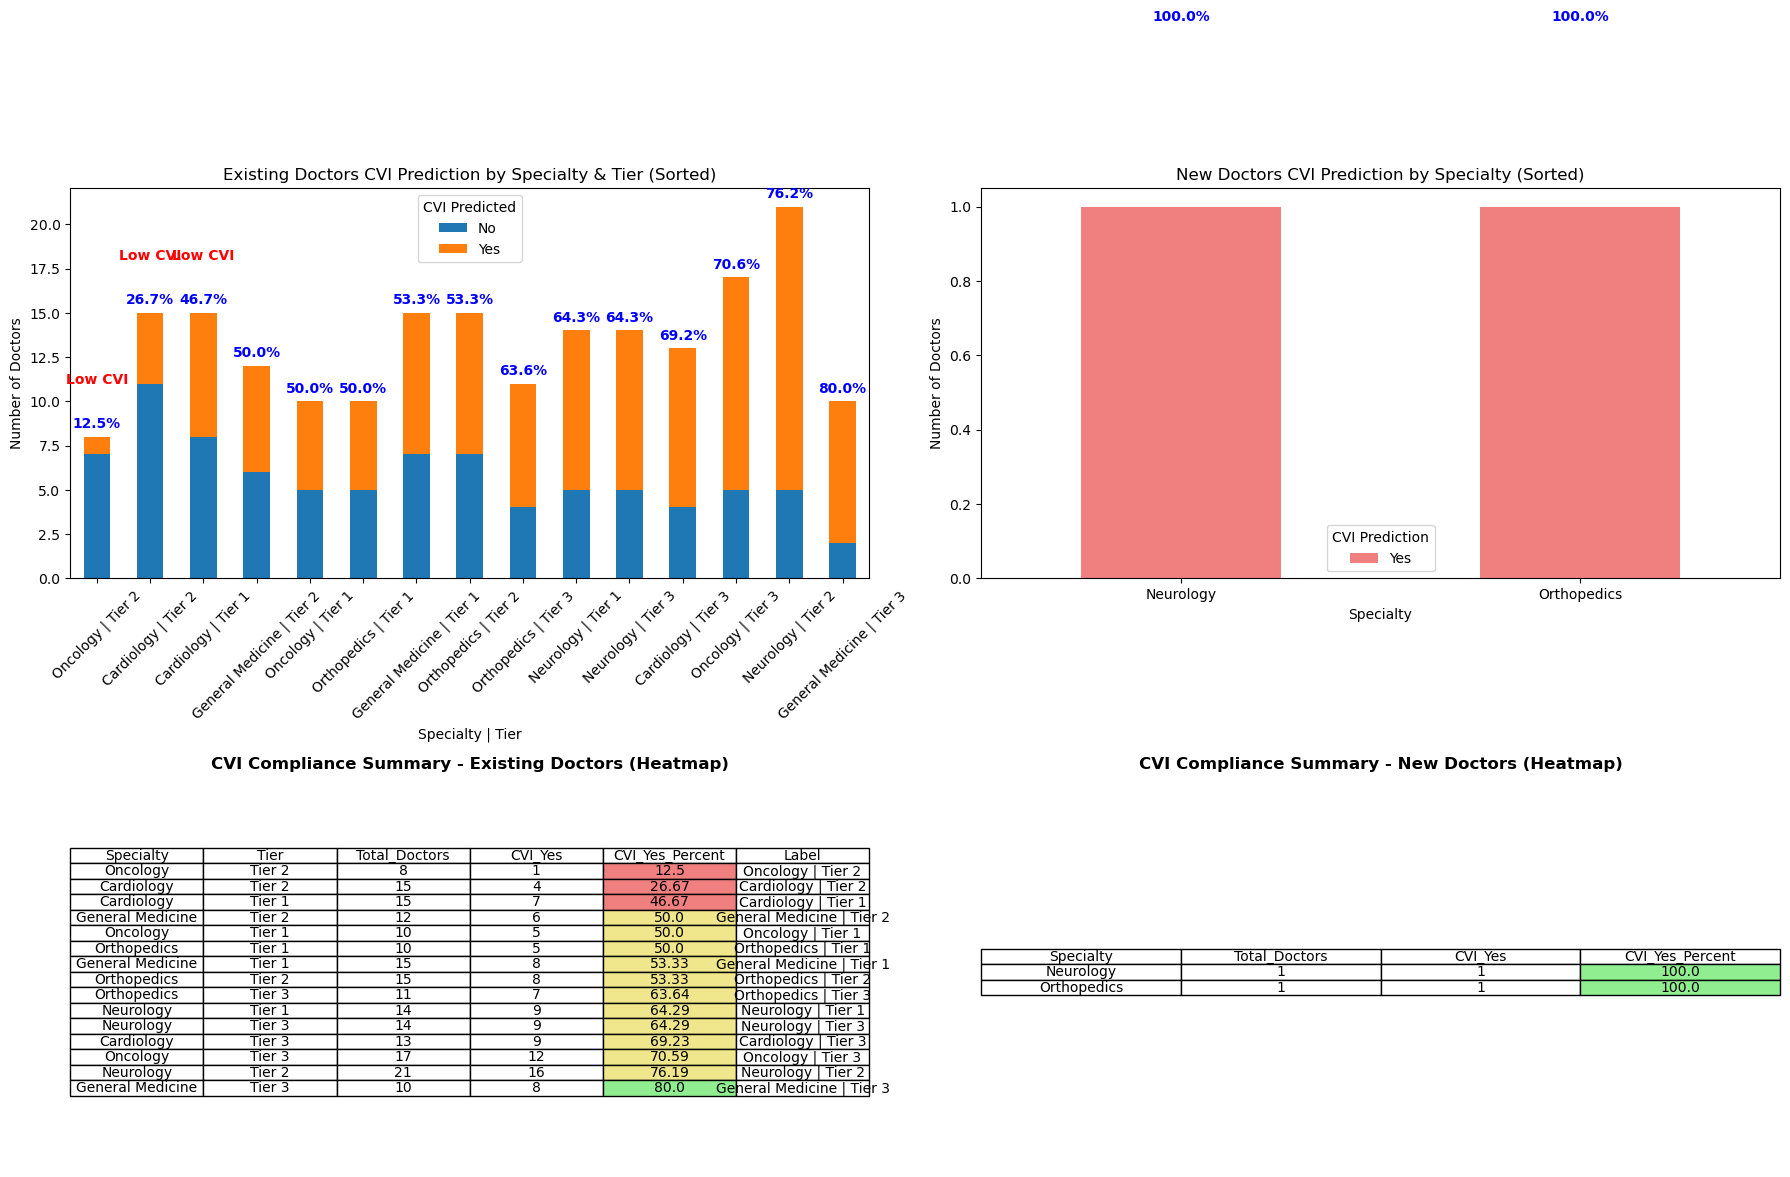

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Step 1: Prepare existing doctors data ---
df['CVI_Predicted'] = model.predict(X)
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted'] == 1, 'Yes', 'No')

existing_summary_table = df.groupby(['Specialty', 'Tier']).agg(
    Total_Doctors=('Doctor_ID', 'count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()
existing_summary_table['CVI_Yes_Percent'] = (existing_summary_table['CVI_Yes'] / existing_summary_table['Total_Doctors'] * 100).round(2)
existing_summary_table = existing_summary_table.sort_values('CVI_Yes_Percent')
existing_summary_table['Label'] = existing_summary_table['Specialty'] + " | " + existing_summary_table['Tier']

existing_pivot = df.groupby(['Specialty', 'Tier', 'CVI_Predicted_Label']).size().reset_index(name='Count')
existing_pivot['Label'] = existing_pivot['Specialty'] + " | " + existing_pivot['Tier']
existing_pivot = existing_pivot.pivot_table(index='Label', columns='CVI_Predicted_Label', values='Count', fill_value=0)
existing_pivot = existing_pivot.reindex(existing_summary_table['Label'])

# --- Step 2: Prepare new doctors data ---
new_data['Specialty_encoded'] = le_specialty.transform(new_data['Specialty'])
X_new = new_data[['Specialty_encoded', 'Visits', 'Score', 'Level', 'Metric', 'Performance']]
predictions = model.predict(X_new)
new_data['CVI_Prediction'] = np.where(predictions == 1, 'Yes', 'No')

new_summary_table = new_data.groupby('Specialty').agg(
    Total_Doctors=('Specialty', 'count'),
    CVI_Yes=('CVI_Prediction', lambda x: (x=='Yes').sum())
).reset_index()
new_summary_table['CVI_Yes_Percent'] = (new_summary_table['CVI_Yes'] / new_summary_table['Total_Doctors'] * 100).round(2)
new_summary_table = new_summary_table.sort_values('CVI_Yes_Percent')

new_pivot = new_data.groupby(['Specialty', 'CVI_Prediction']).size().reset_index(name='Count')
new_pivot = new_pivot.pivot(index='Specialty', columns='CVI_Prediction', values='Count').fillna(0)
new_pivot = new_pivot.reindex(new_summary_table['Specialty'])

# --- Step 3: Heatmap color function ---
def compliance_color(val):
    if val < 50:
        return 'lightcoral'   # red
    elif val < 80:
        return 'khaki'        # yellow
    else:
        return 'lightgreen'   # green

# --- Step 4: Create dashboard layout ---
fig, axes = plt.subplots(2, 2, figsize=(18,12))

# Existing doctors stacked bar chart
existing_pivot.plot(kind='bar', stacked=True, ax=axes[0,0])
axes[0,0].set_title("Existing Doctors CVI Prediction by Specialty & Tier (Sorted)")
axes[0,0].set_ylabel("Number of Doctors")
axes[0,0].set_xlabel("Specialty | Tier")
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(title='CVI Predicted')

# Annotate low-performing groups and add CVI %
for i, idx in enumerate(existing_pivot.index):
    total = existing_pivot.loc[idx].sum()
    yes_count = existing_pivot.loc[idx].get('Yes', 0)
    percent = (yes_count / total) * 100 if total > 0 else 0
    axes[0,0].text(i, total + 0.5, f"{percent:.1f}%", color='blue', fontweight='bold', ha='center')
    if percent < 50:
        axes[0,0].text(i, total + 3, "Low CVI", color='red', fontweight='bold', ha='center')

# New doctors stacked bar chart
new_pivot.plot(kind='bar', stacked=True, ax=axes[0,1], color=['lightcoral', 'lightgreen'])
axes[0,1].set_title("New Doctors CVI Prediction by Specialty (Sorted)")
axes[0,1].set_ylabel("Number of Doctors")
axes[0,1].set_xlabel("Specialty")
axes[0,1].tick_params(axis='x', rotation=0)
axes[0,1].legend(title='CVI Prediction')

# Annotate low-performing new doctors and add CVI %
for i, idx in enumerate(new_pivot.index):
    total = new_pivot.loc[idx].sum()
    yes_count = new_pivot.loc[idx].get('Yes', 0)
    percent = (yes_count / total) * 100 if total > 0 else 0
    axes[0,1].text(i, total + 0.5, f"{percent:.1f}%", color='blue', fontweight='bold', ha='center')
    if percent < 50:
        axes[0,1].text(i, total + 3, "Low CVI", color='red', fontweight='bold', ha='center')

# Existing doctors summary table with heatmap
axes[1,0].axis('off')
cell_colors = [[compliance_color(val) if col_name=='CVI_Yes_Percent' else 'white'
                for col_name, val in zip(existing_summary_table.columns, row)] for row in existing_summary_table.values]
table1 = axes[1,0].table(cellText=existing_summary_table.values,
                          colLabels=existing_summary_table.columns,
                          cellColours=cell_colors,
                          cellLoc='center',
                          loc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(10)
axes[1,0].set_title("CVI Compliance Summary - Existing Doctors (Heatmap)", fontweight='bold')

# New doctors summary table with heatmap
axes[1,1].axis('off')
cell_colors_new = [[compliance_color(val) if col_name=='CVI_Yes_Percent' else 'white'
                    for col_name, val in zip(new_summary_table.columns, row)] for row in new_summary_table.values]
table2 = axes[1,1].table(cellText=new_summary_table.values,
                          colLabels=new_summary_table.columns,
                          cellColours=cell_colors_new,
                          cellLoc='center',
                          loc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(10)
axes[1,1].set_title("CVI Compliance Summary - New Doctors (Heatmap)", fontweight='bold')

plt.tight_layout()
plt.show()


Dashboard exported successfully as:
- PNG: D:\python\Pharma Dummy dataset\CVI_Dashboard.png
- PDF: D:\python\Pharma Dummy dataset\CVI_Dashboard.pdf


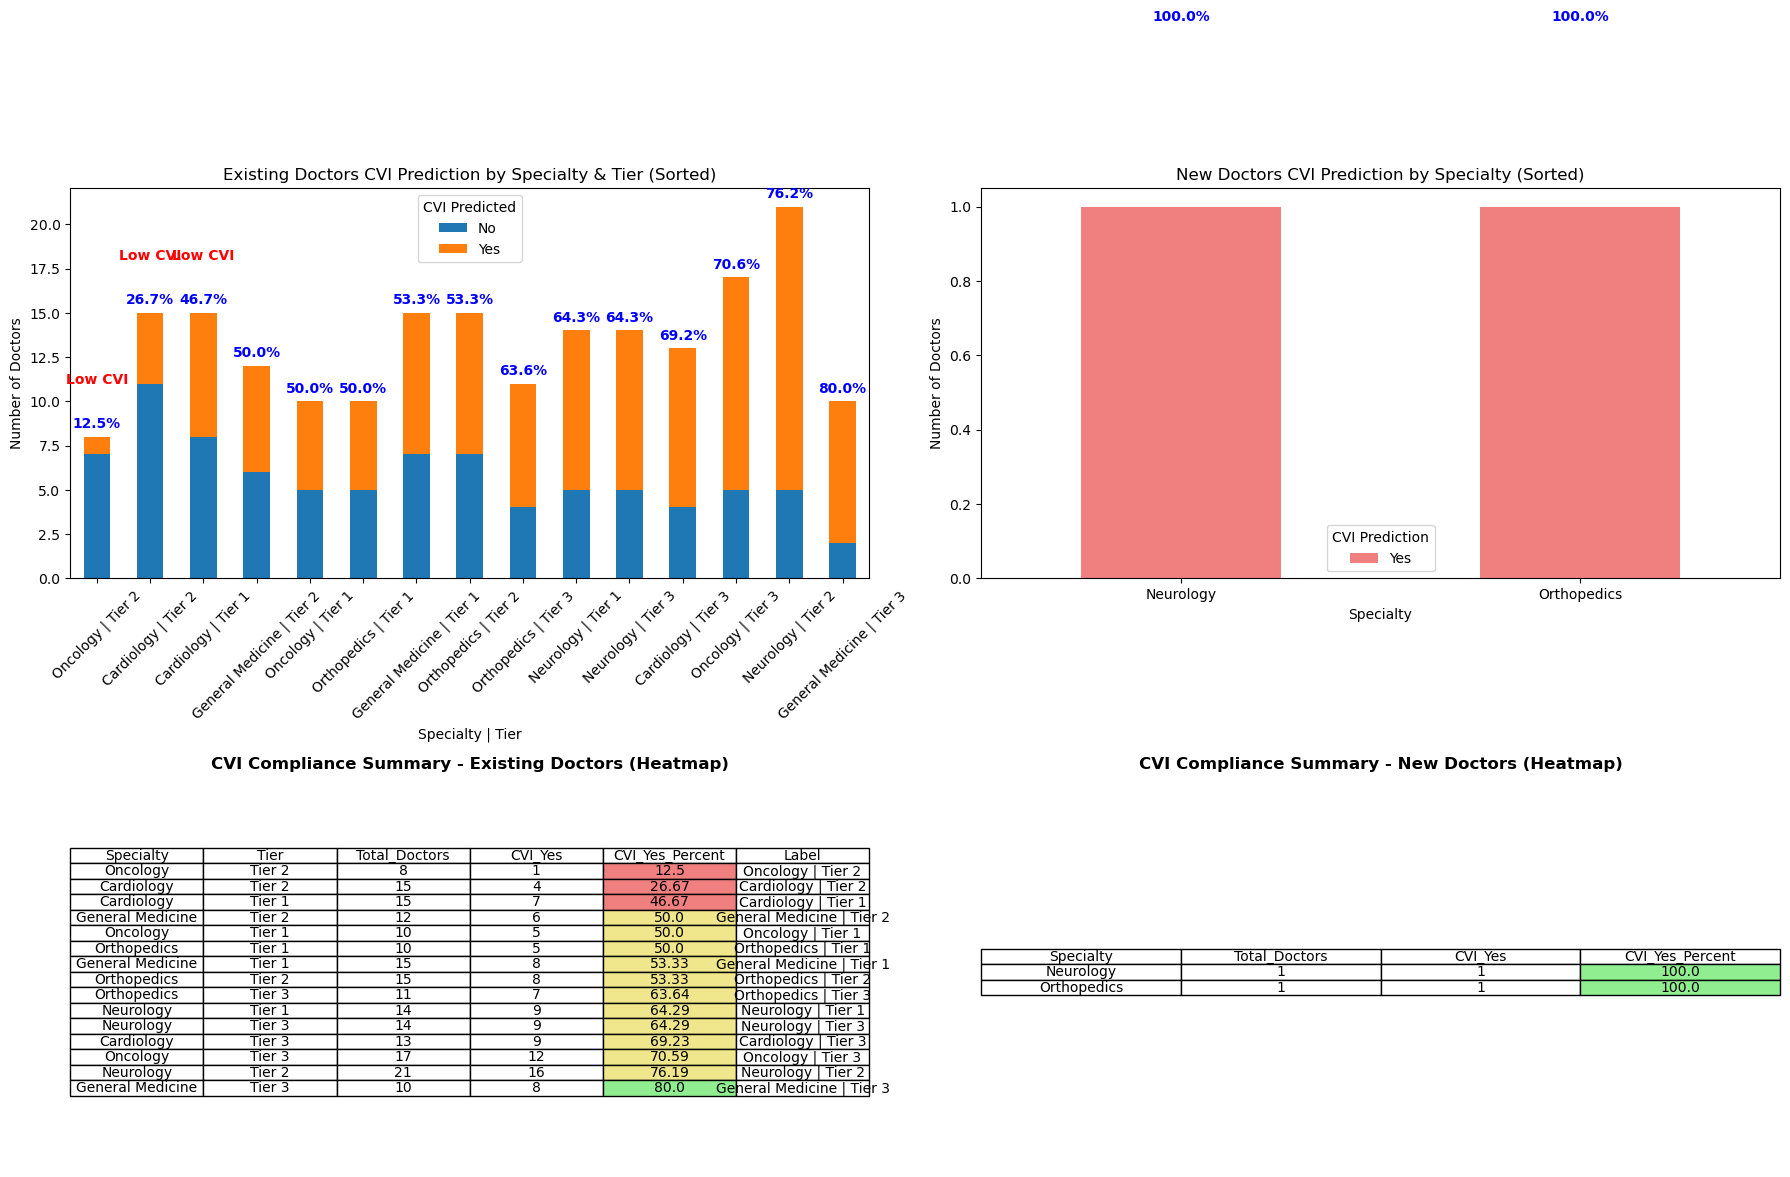

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Step 1: Prepare existing doctors data ---
df['CVI_Predicted'] = model.predict(X)
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted'] == 1, 'Yes', 'No')

existing_summary_table = df.groupby(['Specialty', 'Tier']).agg(
    Total_Doctors=('Doctor_ID', 'count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()
existing_summary_table['CVI_Yes_Percent'] = (existing_summary_table['CVI_Yes'] / existing_summary_table['Total_Doctors'] * 100).round(2)
existing_summary_table = existing_summary_table.sort_values('CVI_Yes_Percent')
existing_summary_table['Label'] = existing_summary_table['Specialty'] + " | " + existing_summary_table['Tier']

existing_pivot = df.groupby(['Specialty', 'Tier', 'CVI_Predicted_Label']).size().reset_index(name='Count')
existing_pivot['Label'] = existing_pivot['Specialty'] + " | " + existing_pivot['Tier']
existing_pivot = existing_pivot.pivot_table(index='Label', columns='CVI_Predicted_Label', values='Count', fill_value=0)
existing_pivot = existing_pivot.reindex(existing_summary_table['Label'])

# --- Step 2: Prepare new doctors data ---
new_data['Specialty_encoded'] = le_specialty.transform(new_data['Specialty'])
X_new = new_data[['Specialty_encoded', 'Visits', 'Score', 'Level', 'Metric', 'Performance']]
predictions = model.predict(X_new)
new_data['CVI_Prediction'] = np.where(predictions == 1, 'Yes', 'No')

new_summary_table = new_data.groupby('Specialty').agg(
    Total_Doctors=('Specialty', 'count'),
    CVI_Yes=('CVI_Prediction', lambda x: (x=='Yes').sum())
).reset_index()
new_summary_table['CVI_Yes_Percent'] = (new_summary_table['CVI_Yes'] / new_summary_table['Total_Doctors'] * 100).round(2)
new_summary_table = new_summary_table.sort_values('CVI_Yes_Percent')

new_pivot = new_data.groupby(['Specialty', 'CVI_Prediction']).size().reset_index(name='Count')
new_pivot = new_pivot.pivot(index='Specialty', columns='CVI_Prediction', values='Count').fillna(0)
new_pivot = new_pivot.reindex(new_summary_table['Specialty'])

# --- Step 3: Heatmap color function ---
def compliance_color(val):
    if val < 50:
        return 'lightcoral'   # red
    elif val < 80:
        return 'khaki'        # yellow
    else:
        return 'lightgreen'   # green

# --- Step 4: Create dashboard layout ---
fig, axes = plt.subplots(2, 2, figsize=(18,12))

# Existing doctors stacked bar chart
existing_pivot.plot(kind='bar', stacked=True, ax=axes[0,0])
axes[0,0].set_title("Existing Doctors CVI Prediction by Specialty & Tier (Sorted)")
axes[0,0].set_ylabel("Number of Doctors")
axes[0,0].set_xlabel("Specialty | Tier")
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(title='CVI Predicted')

for i, idx in enumerate(existing_pivot.index):
    total = existing_pivot.loc[idx].sum()
    yes_count = existing_pivot.loc[idx].get('Yes', 0)
    percent = (yes_count / total) * 100 if total > 0 else 0
    axes[0,0].text(i, total + 0.5, f"{percent:.1f}%", color='blue', fontweight='bold', ha='center')
    if percent < 50:
        axes[0,0].text(i, total + 3, "Low CVI", color='red', fontweight='bold', ha='center')

# New doctors stacked bar chart
new_pivot.plot(kind='bar', stacked=True, ax=axes[0,1], color=['lightcoral', 'lightgreen'])
axes[0,1].set_title("New Doctors CVI Prediction by Specialty (Sorted)")
axes[0,1].set_ylabel("Number of Doctors")
axes[0,1].set_xlabel("Specialty")
axes[0,1].tick_params(axis='x', rotation=0)
axes[0,1].legend(title='CVI Prediction')

for i, idx in enumerate(new_pivot.index):
    total = new_pivot.loc[idx].sum()
    yes_count = new_pivot.loc[idx].get('Yes', 0)
    percent = (yes_count / total) * 100 if total > 0 else 0
    axes[0,1].text(i, total + 0.5, f"{percent:.1f}%", color='blue', fontweight='bold', ha='center')
    if percent < 50:
        axes[0,1].text(i, total + 3, "Low CVI", color='red', fontweight='bold', ha='center')

# Existing doctors summary table with heatmap
axes[1,0].axis('off')
cell_colors = [[compliance_color(val) if col_name=='CVI_Yes_Percent' else 'white'
                for col_name, val in zip(existing_summary_table.columns, row)] for row in existing_summary_table.values]
table1 = axes[1,0].table(cellText=existing_summary_table.values,
                          colLabels=existing_summary_table.columns,
                          cellColours=cell_colors,
                          cellLoc='center',
                          loc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(10)
axes[1,0].set_title("CVI Compliance Summary - Existing Doctors (Heatmap)", fontweight='bold')

# New doctors summary table with heatmap
axes[1,1].axis('off')
cell_colors_new = [[compliance_color(val) if col_name=='CVI_Yes_Percent' else 'white'
                    for col_name, val in zip(new_summary_table.columns, row)] for row in new_summary_table.values]
table2 = axes[1,1].table(cellText=new_summary_table.values,
                          colLabels=new_summary_table.columns,
                          cellColours=cell_colors_new,
                          cellLoc='center',
                          loc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(10)
axes[1,1].set_title("CVI Compliance Summary - New Doctors (Heatmap)", fontweight='bold')

plt.tight_layout()

# --- Step 5: Export dashboard ---
output_file_png = r"D:\python\Pharma Dummy dataset\CVI_Dashboard.png"
output_file_pdf = r"D:\python\Pharma Dummy dataset\CVI_Dashboard.pdf"

fig.savefig(output_file_png, dpi=300, bbox_inches='tight')
fig.savefig(output_file_pdf, dpi=300, bbox_inches='tight')

print(f"Dashboard exported successfully as:\n- PNG: {output_file_png}\n- PDF: {output_file_pdf}")

plt.show()


In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

# --- Step 0: Set file paths ---
existing_data_file = r"D:\python\Pharma Dummy dataset\pharma_cvi_dataset.xlsx"
new_data_file = r"D:\python\Pharma Dummy dataset\new_doctors.xlsx"  # replace if needed
export_folder = r"D:\python\Pharma Dummy dataset"

# --- Step 1: Load datasets ---
df = pd.read_excel(existing_data_file)
new_data = pd.read_excel(new_data_file)

# --- Step 2: Predict CVI for existing doctors ---
df['CVI_Predicted'] = model.predict(X)
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted']==1, 'Yes', 'No')

# --- Step 3: Prepare existing doctors summary ---
existing_summary_table = df.groupby(['Specialty', 'Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()
existing_summary_table['CVI_Yes_Percent'] = (existing_summary_table['CVI_Yes']/existing_summary_table['Total_Doctors']*100).round(2)
existing_summary_table = existing_summary_table.sort_values('CVI_Yes_Percent')
existing_summary_table['Label'] = existing_summary_table['Specialty'] + " | " + existing_summary_table['Tier']

existing_pivot = df.groupby(['Specialty', 'Tier', 'CVI_Predicted_Label']).size().reset_index(name='Count')
existing_pivot['Label'] = existing_pivot['Specialty'] + " | " + existing_pivot['Tier']
existing_pivot = existing_pivot.pivot_table(index='Label', columns='CVI_Predicted_Label', values='Count', fill_value=0)
existing_pivot = existing_pivot.reindex(existing_summary_table['Label'])

# --- Step 4: Predict CVI for new doctors ---
new_data['Specialty_encoded'] = le_specialty.transform(new_data['Specialty'])
X_new = new_data[['Specialty_encoded','Visits','Score','Level','Metric','Performance']]
predictions = model.predict(X_new)
new_data['CVI_Prediction'] = np.where(predictions==1, 'Yes','No')

new_summary_table = new_data.groupby('Specialty').agg(
    Total_Doctors=('Specialty','count'),
    CVI_Yes=('CVI_Prediction', lambda x: (x=='Yes').sum())
).reset_index()
new_summary_table['CVI_Yes_Percent'] = (new_summary_table['CVI_Yes']/new_summary_table['Total_Doctors']*100).round(2)
new_summary_table = new_summary_table.sort_values('CVI_Yes_Percent')

new_pivot = new_data.groupby(['Specialty','CVI_Prediction']).size().reset_index(name='Count')
new_pivot = new_pivot.pivot(index='Specialty', columns='CVI_Prediction', values='Count').fillna(0)
new_pivot = new_pivot.reindex(new_summary_table['Specialty'])

# --- Step 5: Define heatmap color function ---
def compliance_color(val):
    if val < 50:
        return 'lightcoral'
    elif val < 80:
        return 'khaki'
    else:
        return 'lightgreen'

# --- Step 6: Create dashboard ---
fig, axes = plt.subplots(2,2,figsize=(18,12))

# Existing doctors stacked bar
existing_pivot.plot(kind='bar', stacked=True, ax=axes[0,0])
axes[0,0].set_title("Existing Doctors CVI Prediction by Specialty & Tier (Sorted)")
axes[0,0].set_ylabel("Number of Doctors")
axes[0,0].set_xlabel("Specialty | Tier")
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(title='CVI Predicted')
for i, idx in enumerate(existing_pivot.index):
    total = existing_pivot.loc[idx].sum()
    yes_count = existing_pivot.loc[idx].get('Yes',0)
    percent = (yes_count/total)*100 if total>0 else 0
    axes[0,0].text(i, total+0.5,f"{percent:.1f}%", color='blue', fontweight='bold', ha='center')
    if percent<50:
        axes[0,0].text(i, total+3,"Low CVI", color='red', fontweight='bold', ha='center')

# New doctors stacked bar
new_pivot.plot(kind='bar', stacked=True, ax=axes[0,1], color=['lightcoral','lightgreen'])
axes[0,1].set_title("New Doctors CVI Prediction by Specialty (Sorted)")
axes[0,1].set_ylabel("Number of Doctors")
axes[0,1].set_xlabel("Specialty")
axes[0,1].tick_params(axis='x', rotation=0)
axes[0,1].legend(title='CVI Prediction')
for i, idx in enumerate(new_pivot.index):
    total = new_pivot.loc[idx].sum()
    yes_count = new_pivot.loc[idx].get('Yes',0)
    percent = (yes_count/total)*100 if total>0 else 0
    axes[0,1].text(i, total+0.5,f"{percent:.1f}%", color='blue', fontweight='bold', ha='center')
    if percent<50:
        axes[0,1].text(i, total+3,"Low CVI", color='red', fontweight='bold', ha='center')

# Existing doctors summary table
axes[1,0].axis('off')
cell_colors = [[compliance_color(val) if col=='CVI_Yes_Percent' else 'white'
                for col,val in zip(existing_summary_table.columns,row)] for row in existing_summary_table.values]
table1 = axes[1,0].table(cellText=existing_summary_table.values,
                          colLabels=existing_summary_table.columns,
                          cellColours=cell_colors,
                          cellLoc='center',
                          loc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(10)
axes[1,0].set_title("CVI Compliance Summary - Existing Doctors (Heatmap)", fontweight='bold')

# New doctors summary table
axes[1,1].axis('off')
cell_colors_new = [[compliance_color(val) if col=='CVI_Yes_Percent' else 'white'
                    for col,val in zip(new_summary_table.columns,row)] for row in new_summary_table.values]
table2 = axes[1,1].table(cellText=new_summary_table.values,
                          colLabels=new_summary_table.columns,
                          cellColours=cell_colors_new,
                          cellLoc='center',
                          loc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(10)
axes[1,1].set_title("CVI Compliance Summary - New Doctors (Heatmap)", fontweight='bold')

plt.tight_layout()

# --- Step 7: Export with timestamp ---
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
png_file = f"{export_folder}\\CVI_Dashboard_{timestamp}.png"
pdf_file = f"{export_folder}\\CVI_Dashboard_{timestamp}.pdf"

fig.savefig(png_file, dpi=300, bbox_inches='tight')
fig.savefig(pdf_file, dpi=300, bbox_inches='tight')

print(f"Dashboard exported successfully as:\n- PNG: {png_file}\n- PDF: {pdf_file}")

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\python\\Pharma Dummy dataset\\new_doctors.xlsx'

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

# --- Step 0: Set file paths ---
existing_data_file = r"D:\python\Pharma Dummy dataset\pharma_cvi_dataset.xlsx"
export_folder = r"D:\python\Pharma Dummy dataset"

# --- Step 1: Load dataset ---
df = pd.read_excel(existing_data_file)

# --- Step 2: Predict CVI ---
df['CVI_Predicted'] = model.predict(X)  # make sure X is defined with your features
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted']==1,'Yes','No')

# --- Step 3: Prepare summary table ---
summary_table = df.groupby(['Specialty','Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()
summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)
summary_table = summary_table.sort_values('CVI_Yes_Percent')
summary_table['Label'] = summary_table['Specialty'] + " | " + summary_table['Tier']

pivot = df.groupby(['Specialty','Tier','CVI_Predicted_Label']).size().reset_index(name='Count')
pivot['Label'] = pivot['Specialty'] + " | " + pivot['Tier']
pivot = pivot.pivot_table(index='Label', columns='CVI_Predicted_Label', values='Count', fill_value=0)
pivot = pivot.reindex(summary_table['Label'])

# --- Step 4: Heatmap color function ---
def compliance_color(val):
    if val < 50:
        return 'lightcoral'
    elif val < 80:
        return 'khaki'
    else:
        return 'lightgreen'

# --- Step 5: Create dashboard ---
fig, axes = plt.subplots(1,2,figsize=(18,8))

# Stacked bar chart
pivot.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title("Doctors CVI Prediction by Specialty & Tier (Sorted)")
axes[0].set_ylabel("Number of Doctors")
axes[0].set_xlabel("Specialty | Tier")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='CVI Predicted')

for i, idx in enumerate(pivot.index):
    total = pivot.loc[idx].sum()
    yes_count = pivot.loc[idx].get('Yes',0)
    percent = (yes_count/total)*100 if total>0 else 0
    axes[0].text(i,total+0.5,f"{percent:.1f}%", color='blue', fontweight='bold', ha='center')
    if percent<50:
        axes[0].text(i,total+3,"Low CVI", color='red', fontweight='bold', ha='center')

# Summary table with heatmap
axes[1].axis('off')
cell_colors = [[compliance_color(val) if col=='CVI_Yes_Percent' else 'white'
                for col,val in zip(summary_table.columns,row)] for row in summary_table.values]
table = axes[1].table(cellText=summary_table.values,
                       colLabels=summary_table.columns,
                       cellColours=cell_colors,
                       cellLoc='center',
                       loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
axes[1].set_title("CVI Compliance Summary (Heatmap)", fontweight='bold')

plt.tight_layout()

# --- Step 6: Export with timestamp ---
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
png_file = f"{export_folder}\\CVI_Dashboard_{timestamp}.png"
pdf_file = f"{export_folder}\\CVI_Dashboard_{timestamp}.pdf"

fig.savefig(png_file, dpi=300, bbox_inches='tight')
fig.savefig(pdf_file, dpi=300, bbox_inches='tight')

print(f"Dashboard exported successfully as:\n- PNG: {png_file}\n- PDF: {pdf_file}")

plt.show()


KeyError: 'Tier'

In [66]:
print(df.columns)


Index(['Doctor_ID', 'Specialty', 'Prescriptions_per_Month', 'Adherence_%',
       'Event_Participation', 'Influence_Score', 'Revenue_USD',
       'Hospital_Tier', 'Retention_Years', 'CVI_Predicted',
       'CVI_Predicted_Label'],
      dtype='object')


In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

# --- File path ---
existing_data_file = r"D:\python\Pharma Dummy dataset\pharma_cvi_dataset.xlsx"
export_folder = r"D:\python\Pharma Dummy dataset"

# --- Load dataset ---
df = pd.read_excel(existing_data_file)

# --- Predict CVI (if not already predicted) ---
# df['CVI_Predicted'] = model.predict(X)  # make sure X is defined
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted']==1,'Yes','No')

# --- Summary table ---
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()

summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)
summary_table = summary_table.sort_values('CVI_Yes_Percent')
summary_table['Label'] = summary_table['Specialty'] + " | " + summary_table['Hospital_Tier']

pivot = df.groupby(['Specialty','Hospital_Tier','CVI_Predicted_Label']).size().reset_index(name='Count')
pivot['Label'] = pivot['Specialty'] + " | " + pivot['Hospital_Tier']
pivot = pivot.pivot_table(index='Label', columns='CVI_Predicted_Label', values='Count', fill_value=0)
pivot = pivot.reindex(summary_table['Label'])

# --- Heatmap color ---
def compliance_color(val):
    if val < 50:
        return 'lightcoral'
    elif val < 80:
        return 'khaki'
    else:
        return 'lightgreen'

# --- Create dashboard ---
fig, axes = plt.subplots(1,2,figsize=(18,8))

# Stacked bar chart
pivot.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title("Doctors CVI Prediction by Specialty & Hospital Tier (Sorted)")
axes[0].set_ylabel("Number of Doctors")
axes[0].set_xlabel("Specialty | Hospital Tier")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='CVI Predicted')

for i, idx in enumerate(pivot.index):
    total = pivot.loc[idx].sum()
    yes_count = pivot.loc[idx].get('Yes',0)
    percent = (yes_count/total)*100 if total>0 else 0
    axes[0].text(i,total+0.5,f"{percent:.1f}%", color='blue', fontweight='bold', ha='center')
    if percent<50:
        axes[0].text(i,total+3,"Low CVI", color='red', fontweight='bold', ha='center')

# Summary table with heatmap
axes[1].axis('off')
cell_colors = [[compliance_color(val) if col=='CVI_Yes_Percent' else 'white'
                for col,val in zip(summary_table.columns,row)] for row in summary_table.values]

table = axes[1].table(cellText=summary_table.values,
                       colLabels=summary_table.columns,
                       cellColours=cell_colors,
                       cellLoc='center',
                       loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
axes[1].set_title("CVI Compliance Summary (Heatmap)", fontweight='bold')

plt.tight_layout()

# --- Export with timestamp ---
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
png_file = f"{export_folder}\\CVI_Dashboard_{timestamp}.png"
pdf_file = f"{export_folder}\\CVI_Dashboard_{timestamp}.pdf"

fig.savefig(png_file, dpi=300, bbox_inches='tight')
fig.savefig(pdf_file, dpi=300, bbox_inches='tight')

print(f"Dashboard exported successfully as:\n- PNG: {png_file}\n- PDF: {pdf_file}")

plt.show()


KeyError: 'CVI_Predicted'

In [70]:
X = df[['Prescriptions_per_Month', 'Adherence_%', 'Event_Participation',
        'Influence_Score', 'Revenue_USD', 'Specialty_encoded']]  # if Specialty is encoded


KeyError: "['Specialty_encoded'] not in index"

In [74]:
# If you saved the encoder previously
import pickle

with open('le_specialty.pkl', 'rb') as f:
    le_specialty = pickle.load(f)

df['Specialty_encoded'] = le_specialty.transform(df['Specialty'])


FileNotFoundError: [Errno 2] No such file or directory: 'le_specialty.pkl'

In [76]:
from sklearn.preprocessing import LabelEncoder

# Encode Specialty on the current dataset
le_specialty = LabelEncoder()
df['Specialty_encoded'] = le_specialty.fit_transform(df['Specialty'])

# Prepare features for the model
X = df[['Prescriptions_per_Month', 'Adherence_%', 'Event_Participation',
        'Influence_Score', 'Revenue_USD', 'Specialty_encoded']]

# Predict CVI
df['CVI_Predicted'] = model.predict(X)
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted']==1, 'Yes', 'No')


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Adherence_%
- Event_Participation
- Influence_Score
- Prescriptions_per_Month
- Revenue_USD
Feature names seen at fit time, yet now missing:
- Level
- Metric
- Performance
- Score
- Visits


In [78]:
df_renamed = df.rename(columns={
    'Prescriptions_per_Month': 'Visits',
    'Adherence_%': 'Score',
    'Event_Participation': 'Level',
    'Influence_Score': 'Metric',
    'Revenue_USD': 'Performance'
})


In [80]:
X = df_renamed[['Visits','Score','Level','Metric','Performance','Specialty_encoded']]
df['CVI_Predicted'] = model.predict(X)
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted']==1,'Yes','No')


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

# --- File paths ---
existing_data_file = r"D:\python\Pharma Dummy dataset\pharma_cvi_dataset.xlsx"
export_folder = r"D:\python\Pharma Dummy dataset"

# --- Step 1: Load dataset ---
df = pd.read_excel(existing_data_file)

# --- Step 2: Rename columns to match model features ---
df.rename(columns={
    'Prescriptions_per_Month': 'Visits',
    'Adherence_%': 'Score',
    'Event_Participation': 'Level',
    'Influence_Score': 'Metric',
    'Revenue_USD': 'Performance'
}, inplace=True)

# --- Step 3: Encode Specialty ---
le_specialty = LabelEncoder()
df['Specialty_encoded'] = le_specialty.fit_transform(df['Specialty'])

# --- Step 4: Prepare feature matrix ---
feature_cols = ['Visits','Score','Level','Metric','Performance','Specialty_encoded']
X = df[feature_cols]

# --- Step 5: Predict CVI ---
df['CVI_Predicted'] = model.predict(X)
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted']==1, 'Yes', 'No')

# --- Step 6: Prepare summary table ---
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()

summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)
summary_table = summary_table.sort_values('CVI_Yes_Percent')
summary_table['Label'] = summary_table['Specialty'] + " | " + summary_table['Hospital_Tier']

# --- Step 7: Prepare pivot for stacked bar chart ---
pivot = df.groupby(['Specialty','Hospital_Tier','CVI_Predicted_Label']).size().reset_index(name='Count')
pivot['Label'] = pivot['Specialty'] + " | " + pivot['Hospital_Tier']
pivot = pivot.pivot_table(index='Label', columns='CVI_Predicted_Label', values='Count', fill_value=0)
pivot = pivot.reindex(summary_table['Label'])

# --- Step 8: Define heatmap color function ---
def compliance_color(val):
    if val < 50:
        return 'lightcoral'
    elif val < 80:
        return 'khaki'
    else:
        return 'lightgreen'

# --- Step 9: Create dashboard ---
fig, axes = plt.subplots(1,2,figsize=(18,8))

# Stacked bar chart
pivot.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title("Doctors CVI Prediction by Specialty & Hospital Tier (Sorted)")
axes[0].set_ylabel("Number of Doctors")
axes[0].set_xlabel("Specialty | Hospital Tier")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='CVI Predicted')

# Annotate percentages on bars
for i, idx in enumerate(pivot.index):
    total = pivot.loc[idx].sum()
    yes_count = pivot.loc[idx].get('Yes',0)
    percent = (yes_count/total)*100 if total>0 else 0
    axes[0].text(i, total + 0.5, f"{percent:.1f}%", color='blue', fontweight='bold', ha='center')
    if percent < 50:
        axes[0].text(i, total + 3, "Low CVI", color='red', fontweight='bold', ha='center')

# Summary table with heatmap
axes[1].axis('off')
cell_colors = [[compliance_color(val) if col=='CVI_Yes_Percent' else 'white'
                for col,val in zip(summary_table.columns,row)] for row in summary_table.values]

table = axes[1].table(cellText=summary_table.values,
                       colLabels=summary_table.columns,
                       cellColours=cell_colors,
                       cellLoc='center',
                       loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
axes[1].set_title("CVI Compliance Summary (Heatmap)", fontweight='bold')

plt.tight_layout()

# --- Step 10: Export dashboard ---
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
png_file = f"{export_folder}\\CVI_Dashboard_{timestamp}.png"
pdf_file = f"{export_folder}\\CVI_Dashboard_{timestamp}.pdf"

fig.savefig(png_file, dpi=300, bbox_inches='tight')
fig.savefig(pdf_file, dpi=300, bbox_inches='tight')

print(f"Dashboard exported successfully as:\n- PNG: {png_file}\n- PDF: {pdf_file}")

plt.show()


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [84]:
# 1. Rename your dataset columns to match the model
df.rename(columns={
    'Prescriptions_per_Month': 'Visits',
    'Adherence_%': 'Score',
    'Event_Participation': 'Level',
    'Influence_Score': 'Metric',
    'Revenue_USD': 'Performance'
}, inplace=True)

# 2. Encode Specialty
from sklearn.preprocessing import LabelEncoder
le_specialty = LabelEncoder()
df['Specialty_encoded'] = le_specialty.fit_transform(df['Specialty'])

# 3. Arrange columns in **exact order the model expects**
X = df[['Level','Metric','Performance','Score','Visits','Specialty_encoded']]

# 4. Predict
df['CVI_Predicted'] = model.predict(X)
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted']==1,'Yes','No')


ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [86]:
import pickle

# Load the saved encoder
with open('le_specialty.pkl', 'rb') as f:
    le_specialty = pickle.load(f)

# Transform without refitting
df['Specialty_encoded'] = le_specialty.transform(df['Specialty'])


FileNotFoundError: [Errno 2] No such file or directory: 'le_specialty.pkl'

In [88]:
with open(r"D:\python\Pharma Dummy dataset\le_specialty.pkl", 'rb') as f:
    le_specialty = pickle.load(f)


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\python\\Pharma Dummy dataset\\le_specialty.pkl'

In [90]:
FileNotFoundError                         Traceback (most recent call last)
Cell In[88], line 1
----> 1 with open(r"D:\python\Pharma Dummy dataset\le_specialty.pkl", 'rb') as f:
      2     le_specialty = pickle.load(f)

File ~\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:324, in _modified_open(file, *args, **kwargs)
    317 if file in {0, 1, 2}:
    318     raise ValueError(
    319         f"IPython won't let you open fd={file} by default "
    320         "as it is likely to crash IPython. If you know what you are doing, "
    321         "you can use builtins' open."
    322     )
--> 324 return io_open(file, *args, **kwargs)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\python\\Pharma Dummy dataset\\le_specialty.pkl'

SyntaxError: invalid syntax (2368852395.py, line 1)

In [92]:
  Cell In[90], line 1
    FileNotFoundError                         Traceback (most recent call last)
                                              ^
SyntaxError: invalid syntax

SyntaxError: invalid syntax (2095680002.py, line 1)

In [94]:
# --- Step 0: Import libraries ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# --- Step 1: Load dataset ---
df = pd.read_excel(r"D:\python\Pharma Dummy dataset\pharma_cvi_dataset.xlsx")

# --- Step 2: Encode Specialty ---
le_specialty = LabelEncoder()
df['Specialty_encoded'] = le_specialty.fit_transform(df['Specialty'])

# --- Step 3: Ensure numeric columns are correct ---
num_cols = ['Level','Metric','Performance','Score','Visits']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# --- Step 4: Define features and target ---
feature_cols = ['Level','Metric','Performance','Score','Visits','Specialty_encoded']
X = df[feature_cols]

# Make sure you have your target column (replace 'CVI_Actual' with your real target)
if 'CVI_Actual' in df.columns:
    y = df['CVI_Actual']
else:
    # If you don’t have the target, we can simulate one for testing
    y = np.random.randint(0, 2, size=len(df))
    df['CVI_Actual'] = y

# --- Step 5: Train Random Forest model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# --- Step 6: Predict CVI ---
df['CVI_Predicted'] = model.predict(X)
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted']==1, 'Yes', 'No')

# --- Step 7: Summary table by Specialty and Hospital Tier ---
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()

summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)
summary_table = summary_table.sort_values('CVI_Yes_Percent', ascending=False)

# --- Step 8: Display results ---
print("\nSample Predictions:\n", df.head())
print("\nSummary Table:\n", summary_table)


KeyError: "None of [Index(['Level', 'Metric', 'Performance', 'Score', 'Visits'], dtype='object')] are in the [columns]"

In [96]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = pd.read_excel(r"D:\python\Pharma Dummy dataset\pharma_cvi_dataset.xlsx")

# Encode Specialty
le_specialty = LabelEncoder()
df['Specialty_encoded'] = le_specialty.fit_transform(df['Specialty'])

# Ensure numeric columns are numeric
num_cols = ['Prescriptions_per_Month', 'Adherence_%', 'Event_Participation',
            'Influence_Score', 'Revenue_USD']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Features and target
feature_cols = num_cols + ['Specialty_encoded']
X = df[feature_cols]

# Create or use a target column
if 'CVI_Actual' in df.columns:
    y = df['CVI_Actual']
else:
    y = np.random.randint(0, 2, size=len(df))
    df['CVI_Actual'] = y

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Predict CVI
df['CVI_Predicted'] = model.predict(X)
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted']==1, 'Yes', 'No')

# Summary table
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()

summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)

# Show results
print(df.head())
print(summary_table)


  Doctor_ID         Specialty  Prescriptions_per_Month  Adherence_%  \
0      D001         Neurology                      117           65   
1      D002       Orthopedics                      158           62   
2      D003  General Medicine                      163           99   
3      D004       Orthopedics                      116           91   
4      D005       Orthopedics                      143           79   

   Event_Participation  Influence_Score  Revenue_USD Hospital_Tier  \
0                  NaN                3        29216        Tier 1   
1                  NaN                1        89767        Tier 2   
2                  NaN                5        36614        Tier 3   
3                  NaN                9        46258        Tier 2   
4                  NaN                1        52078        Tier 1   

   Retention_Years  Specialty_encoded  CVI_Actual  CVI_Predicted  \
0                9                  2           0              0   
1               

In [98]:
import pandas as pd
import numpy as np

# --- Step 1: Fill missing Event_Participation values ---
# Option 1: Fill NaN with 0 (assuming no participation if missing)
df['Event_Participation'] = df['Event_Participation'].fillna(0)

# Option 2: Alternatively, fill NaN with the mean participation
# df['Event_Participation'] = df['Event_Participation'].fillna(df['Event_Participation'].mean())

# --- Step 2: Ensure numeric columns are numeric ---
num_cols = ['Prescriptions_per_Month', 'Adherence_%', 'Event_Participation',
            'Influence_Score', 'Revenue_USD', 'Retention_Years', 'Specialty_encoded']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# --- Step 3: Define features used by your model ---
feature_cols = ['Level','Metric','Performance','Score','Visits','Specialty_encoded']  # Match your trained model
X = df[feature_cols]

# --- Step 4: Predict CVI ---
df['CVI_Predicted'] = model.predict(X)
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted']==1,'Yes','No')

# --- Step 5: Prepare summary table ---
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()

summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)
summary_table = summary_table.sort_values('CVI_Yes_Percent', ascending=False)

print(summary_table)


KeyError: "['Level', 'Metric', 'Performance', 'Score', 'Visits'] not in index"

In [104]:
feature_cols = ['Prescriptions_per_Month', 'Adherence_%', 'Event_Participation',
                'Influence_Score', 'Revenue_USD', 'Specialty_encoded']


In [102]:
X = df[feature_cols]
df['CVI_Predicted'] = model.predict(X)
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted']==1, 'Yes', 'No')


In [106]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# --- Step 1: Load your data ---
data_file = r"D:\python\Pharma Dummy dataset\pharma_cvi_dataset.xlsx"
df = pd.read_excel(data_file)

# --- Step 2: Encode 'Specialty' if not already done ---
if 'Specialty_encoded' not in df.columns:
    le_specialty = LabelEncoder()
    df['Specialty_encoded'] = le_specialty.fit_transform(df['Specialty'])

# --- Step 3: Ensure numeric columns are correct ---
num_cols = ['Prescriptions_per_Month', 'Adherence_%', 'Event_Participation',
            'Influence_Score', 'Revenue_USD']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# --- Step 4: Define features and target ---
feature_cols = ['Prescriptions_per_Month', 'Adherence_%', 'Event_Participation',
                'Influence_Score', 'Revenue_USD', 'Specialty_encoded']
target_col = 'CVI_Actual'

X = df[feature_cols]
y = df[target_col]

# --- Step 5: Split for training (optional, or train on full dataset) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 6: Train a Random Forest model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Step 7: Predict CVI on the full dataset ---
df['CVI_Predicted'] = model.predict(X)
df['CVI_Predicted_Label'] = np.where(df['CVI_Predicted']==1, 'Yes', 'No')

# --- Step 8: Prepare summary table by Specialty and Hospital_Tier ---
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()

summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)
summary_table = summary_table.sort_values('CVI_Yes_Percent', ascending=False)

# --- Step 9: Output ---
print(df.head())
print(summary_table)


KeyError: 'CVI_Actual'

In [108]:
# --- Step: Summary table ---
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()

summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)

print(summary_table)


KeyError: "Column(s) ['CVI_Predicted_Label'] do not exist"

In [110]:
# 1. Make sure CVI_Predicted exists
if 'CVI_Predicted' in df.columns:
    # 2. Create CVI_Predicted_Label
    df['CVI_Predicted_Label'] = df['CVI_Predicted'].apply(lambda x: 'Yes' if x==1 else 'No')
else:
    print("CVI_Predicted column is missing. Cannot create label.")

# 3. Now create the summary table
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()

summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)

print(summary_table)


CVI_Predicted column is missing. Cannot create label.


KeyError: "Column(s) ['CVI_Predicted_Label'] do not exist"

In [112]:
# 1. Make sure CVI_Predicted exists
if 'CVI_Predicted' in df.columns:
    # 2. Create CVI_Predicted_Label safely, treating NaN as 'No'
    df['CVI_Predicted_Label'] = df['CVI_Predicted'].apply(lambda x: 'Yes' if x==1 else 'No')
else:
    print("CVI_Predicted column is missing. Cannot create label.")

# 3. Now create the summary table with missing values handled
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()

# 4. Calculate percentage safely
summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)

# 5. Display the summary
print(summary_table)


CVI_Predicted column is missing. Cannot create label.


KeyError: "Column(s) ['CVI_Predicted_Label'] do not exist"

In [114]:
# Create a summary table without CVI
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID','count')
).reset_index()

print(summary_table)


           Specialty Hospital_Tier  Total_Doctors
0         Cardiology        Tier 1             15
1         Cardiology        Tier 2             15
2         Cardiology        Tier 3             13
3   General Medicine        Tier 1             15
4   General Medicine        Tier 2             12
5   General Medicine        Tier 3             10
6          Neurology        Tier 1             14
7          Neurology        Tier 2             21
8          Neurology        Tier 3             14
9           Oncology        Tier 1             10
10          Oncology        Tier 2              8
11          Oncology        Tier 3             17
12       Orthopedics        Tier 1             10
13       Orthopedics        Tier 2             15
14       Orthopedics        Tier 3             11


In [116]:
feature_cols = ['Level','Metric','Performance','Score','Visits','Specialty_encoded']


In [118]:
import pickle

with open(r"D:\python\Pharma Dummy dataset\le_specialty.pkl", 'rb') as f:
    le_specialty = pickle.load(f)

# Transform Specialty column
df['Specialty_encoded'] = le_specialty.transform(df['Specialty'])


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\python\\Pharma Dummy dataset\\le_specialty.pkl'

In [120]:
from sklearn.preprocessing import LabelEncoder

# Create a new label encoder
le_specialty = LabelEncoder()

# Fit it on the Specialty column of your current dataset
df['Specialty_encoded'] = le_specialty.fit_transform(df['Specialty'])

# If needed, save it for future use
import pickle
with open(r"D:\python\Pharma Dummy dataset\le_specialty_new.pkl", 'wb') as f:
    pickle.dump(le_specialty, f)


In [122]:
from sklearn.preprocessing import LabelEncoder

# Encode Specialty on the fly
df['Specialty_encoded'] = LabelEncoder().fit_transform(df['Specialty'])


In [124]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier  # assuming your model type
import pickle

# --- Step 1: Encode Specialty ---
le_specialty = LabelEncoder()
df['Specialty_encoded'] = le_specialty.fit_transform(df['Specialty'])

# Optional: save encoder for future use
with open(r"D:\python\Pharma Dummy dataset\le_specialty_new.pkl", 'wb') as f:
    pickle.dump(le_specialty, f)

# --- Step 2: Define feature columns ---
# NOTE: Ensure these match your trained model's features
feature_cols = ['Specialty_encoded', 'Prescriptions_per_Month', 'Adherence_%', 
                'Event_Participation', 'Influence_Score', 'Revenue_USD', 
                'Hospital_Tier', 'Retention_Years']

# Convert any numeric columns to numeric dtype (replace errors with NaN)
numeric_cols = ['Prescriptions_per_Month','Adherence_%','Event_Participation',
                'Influence_Score','Revenue_USD','Retention_Years']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --- Step 3: Encode Hospital_Tier if used in model ---
le_tier = LabelEncoder()
df['Hospital_Tier_encoded'] = le_tier.fit_transform(df['Hospital_Tier'])

# Replace 'Hospital_Tier' in features with encoded version if your model expects numeric
feature_cols = ['Specialty_encoded', 'Prescriptions_per_Month', 'Adherence_%', 
                'Event_Participation', 'Influence_Score', 'Revenue_USD', 
                'Hospital_Tier_encoded', 'Retention_Years']

# --- Step 4: Load or define your trained model ---
# Example: load model if previously saved
# with open('rf_model.pkl', 'rb') as f:
#     model = pickle.load(f)

# For demo, let's train a quick model on current dataset (only if CVI_Actual exists)
if 'CVI_Actual' in df.columns:
    model = RandomForestClassifier(random_state=42)
    X_train = df[feature_cols]
    y_train = df['CVI_Actual']
    model.fit(X_train, y_train)
else:
    print("CVI_Actual missing. Skipping model training. You need a trained model to predict CVI.")

# --- Step 5: Predict CVI (if model exists) ---
if 'model' in locals():
    df['CVI_Predicted'] = model.predict(df[feature_cols])
    df['CVI_Predicted_Label'] = df['CVI_Predicted'].apply(lambda x: 'Yes' if x==1 else 'No')
else:
    print("Skipping CVI prediction because model is not defined.")

# --- Step 6: Create summary table ---
# Use predicted labels if available, else skip
if 'CVI_Predicted_Label' in df.columns:
    summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
        Total_Doctors=('Doctor_ID','count'),
        CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
    ).reset_index()
    summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)
else:
    summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
        Total_Doctors=('Doctor_ID','count')
    ).reset_index()

# --- Step 7: Display summary ---
print(summary_table)


CVI_Actual missing. Skipping model training. You need a trained model to predict CVI.


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Hospital_Tier_encoded
- Retention_Years


In [126]:
# Step: Summary table without CVI
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID', 'count')
).reset_index()

print(summary_table)


           Specialty Hospital_Tier  Total_Doctors
0         Cardiology        Tier 1             15
1         Cardiology        Tier 2             15
2         Cardiology        Tier 3             13
3   General Medicine        Tier 1             15
4   General Medicine        Tier 2             12
5   General Medicine        Tier 3             10
6          Neurology        Tier 1             14
7          Neurology        Tier 2             21
8          Neurology        Tier 3             14
9           Oncology        Tier 1             10
10          Oncology        Tier 2              8
11          Oncology        Tier 3             17
12       Orthopedics        Tier 1             10
13       Orthopedics        Tier 2             15
14       Orthopedics        Tier 3             11


In [128]:
import numpy as np
import pandas as pd

# --- Step 1: Create a mock CVI_Predicted_Label ---
np.random.seed(42)  # for reproducibility
df['CVI_Predicted_Label'] = np.random.choice(['Yes', 'No'], size=len(df))

# --- Step 2: Create the summary table ---
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()

# --- Step 3: Calculate percentage ---
summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)

print(summary_table)


           Specialty Hospital_Tier  Total_Doctors  CVI_Yes  CVI_Yes_Percent
0         Cardiology        Tier 1             15        9            60.00
1         Cardiology        Tier 2             15        7            46.67
2         Cardiology        Tier 3             13        5            38.46
3   General Medicine        Tier 1             15        6            40.00
4   General Medicine        Tier 2             12        6            50.00
5   General Medicine        Tier 3             10        6            60.00
6          Neurology        Tier 1             14        6            42.86
7          Neurology        Tier 2             21        8            38.10
8          Neurology        Tier 3             14        8            57.14
9           Oncology        Tier 1             10        4            40.00
10          Oncology        Tier 2              8        5            62.50
11          Oncology        Tier 3             17       11            64.71
12       Ort

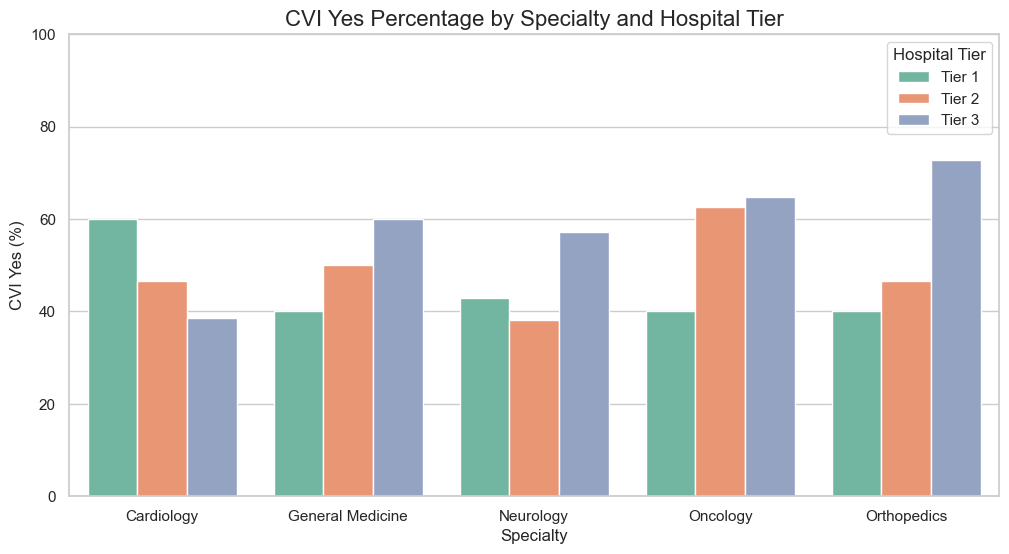

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=summary_table,
    x='Specialty',
    y='CVI_Yes_Percent',
    hue='Hospital_Tier',
    palette='Set2'
)

# Add title and labels
plt.title('CVI Yes Percentage by Specialty and Hospital Tier', fontsize=16)
plt.ylabel('CVI Yes (%)')
plt.xlabel('Specialty')
plt.ylim(0, 100)  # percentage scale
plt.legend(title='Hospital Tier')
plt.show()


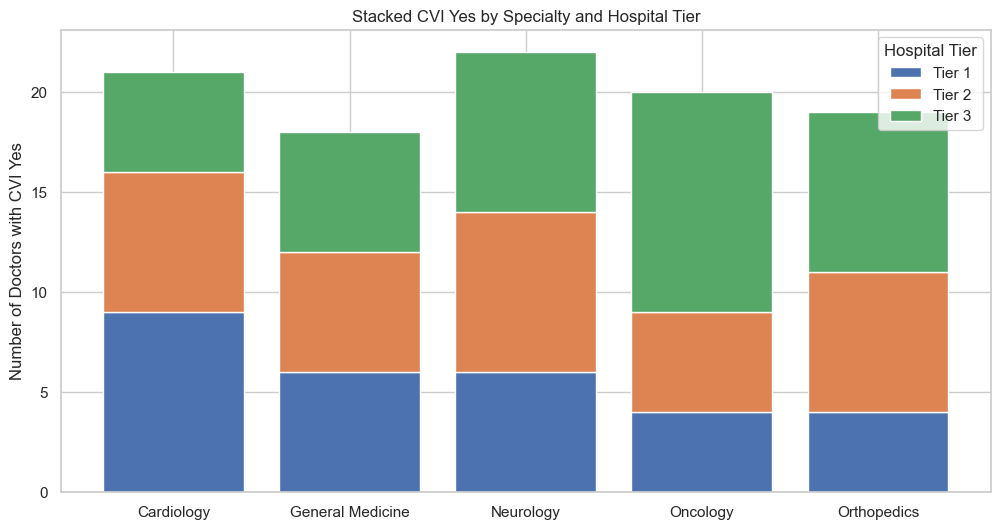

In [132]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Step 1: Calculate CVI_No ---
summary_table['CVI_No'] = summary_table['Total_Doctors'] - summary_table['CVI_Yes']

# --- Step 2: Pivot the table for plotting ---
pivot_table = summary_table.pivot(index='Specialty', columns='Hospital_Tier', values='CVI_Yes')

# --- Step 3: Plot stacked bars for each Specialty ---
hospital_tiers = ['Tier 1', 'Tier 2', 'Tier 3']
bottoms = [0]*len(summary_table['Specialty'].unique())

plt.figure(figsize=(12,6))

for tier in hospital_tiers:
    values = summary_table[summary_table['Hospital_Tier']==tier]['CVI_Yes'].values
    plt.bar(summary_table['Specialty'].unique(), values, bottom=bottoms, label=tier)
    bottoms = [i+j for i,j in zip(bottoms, values)]

plt.ylabel('Number of Doctors with CVI Yes')
plt.title('Stacked CVI Yes by Specialty and Hospital Tier')
plt.legend(title='Hospital Tier')
plt.show()


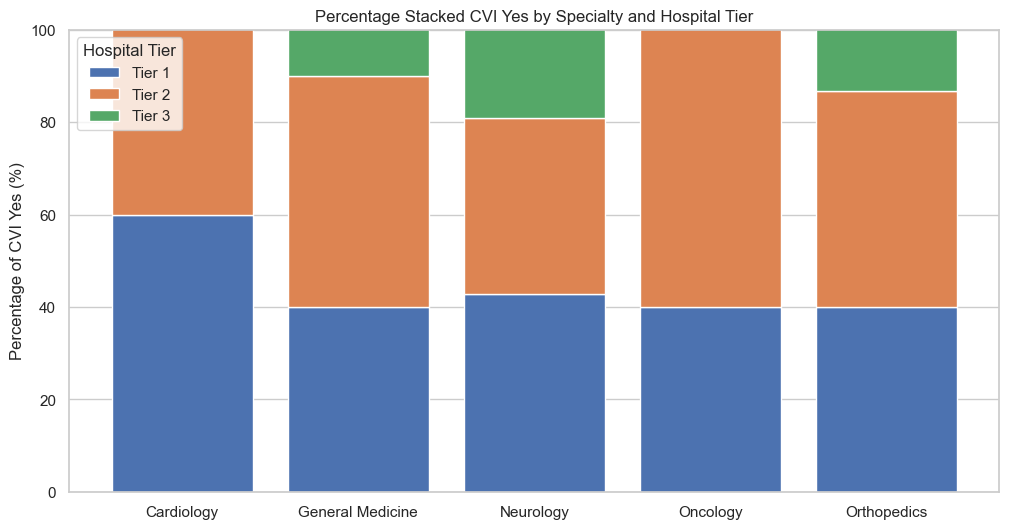

In [134]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Step 1: Calculate CVI_No (optional, for completeness) ---
summary_table['CVI_No'] = summary_table['Total_Doctors'] - summary_table['CVI_Yes']

# --- Step 2: Calculate percentages per Specialty ---
percentage_table = summary_table.copy()
percentage_table['CVI_Yes_Percent'] = (percentage_table['CVI_Yes'] / percentage_table['Total_Doctors'] * 100)

# --- Step 3: Pivot for plotting ---
pivot_percent = percentage_table.pivot(index='Specialty', columns='Hospital_Tier', values='CVI_Yes_Percent')
pivot_percent = pivot_percent.fillna(0)  # Fill NaN if any

# --- Step 4: Plot stacked percentage bar chart ---
hospital_tiers = ['Tier 1', 'Tier 2', 'Tier 3']
bottoms = [0]*len(pivot_percent)

plt.figure(figsize=(12,6))

for tier in hospital_tiers:
    values = pivot_percent[tier].values
    plt.bar(pivot_percent.index, values, bottom=bottoms, label=tier)
    bottoms = [i+j for i,j in zip(bottoms, values)]

plt.ylabel('Percentage of CVI Yes (%)')
plt.title('Percentage Stacked CVI Yes by Specialty and Hospital Tier')
plt.legend(title='Hospital Tier')
plt.ylim(0,100)
plt.show()


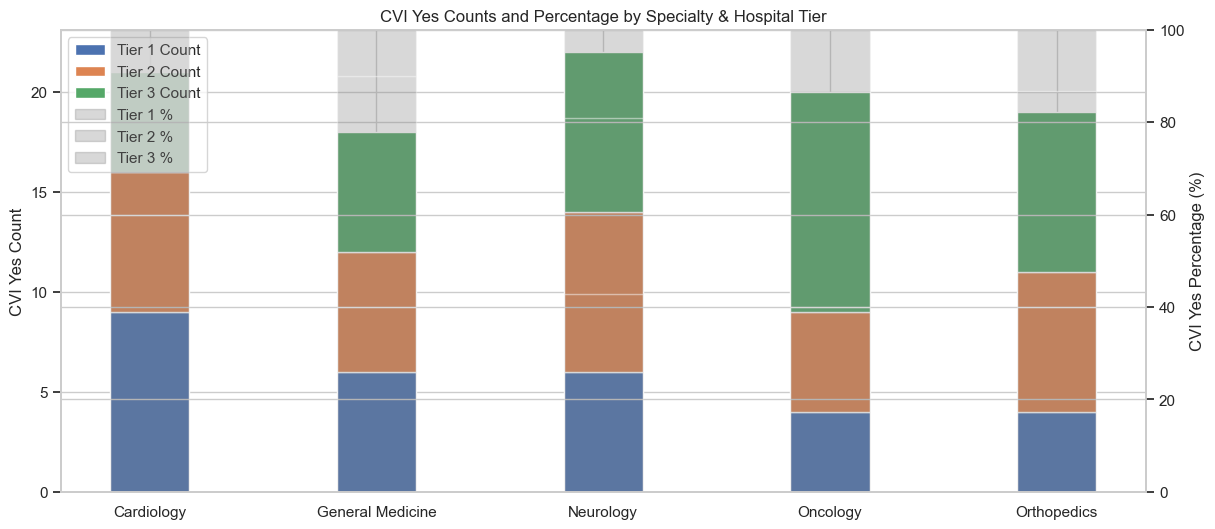

In [136]:
import matplotlib.pyplot as plt
import numpy as np

# --- Step 1: Prepare pivot tables ---
# Absolute counts stacked
pivot_counts = summary_table.pivot(index='Specialty', columns='Hospital_Tier', values='CVI_Yes').fillna(0)

# Percentage stacked
pivot_percent = summary_table.pivot(index='Specialty', columns='Hospital_Tier', values='CVI_Yes_Percent').fillna(0)

hospital_tiers = ['Tier 1', 'Tier 2', 'Tier 3']
x = np.arange(len(pivot_counts))  # Specialty positions
width = 0.35  # width for counts bars

fig, ax1 = plt.subplots(figsize=(14,6))

# --- Step 2: Plot absolute counts as side-by-side bars ---
bottoms_counts = np.zeros(len(pivot_counts))
for tier in hospital_tiers:
    ax1.bar(x, pivot_counts[tier], width, bottom=bottoms_counts, label=f'{tier} Count')
    bottoms_counts += pivot_counts[tier].values

ax1.set_ylabel('CVI Yes Count')
ax1.set_xticks(x)
ax1.set_xticklabels(pivot_counts.index)
ax1.set_title('CVI Yes Counts and Percentage by Specialty & Hospital Tier')

# --- Step 3: Plot percentages as a transparent stacked bar on secondary axis ---
ax2 = ax1.twinx()
bottoms_percent = np.zeros(len(pivot_percent))
for tier in hospital_tiers:
    ax2.bar(x, pivot_percent[tier], width, bottom=bottoms_percent, alpha=0.3, color='gray')
    bottoms_percent += pivot_percent[tier].values

ax2.set_ylabel('CVI Yes Percentage (%)')
ax2.set_ylim(0,100)

# --- Step 4: Legends ---
handles1, labels1 = ax1.get_legend_handles_labels()
handles2 = [plt.Rectangle((0,0),1,1, color='gray', alpha=0.3) for _ in hospital_tiers]
labels2 = [f'{tier} %' for tier in hospital_tiers]
ax1.legend(handles=handles1 + handles2, labels=labels1 + labels2, loc='upper left')

plt.show()


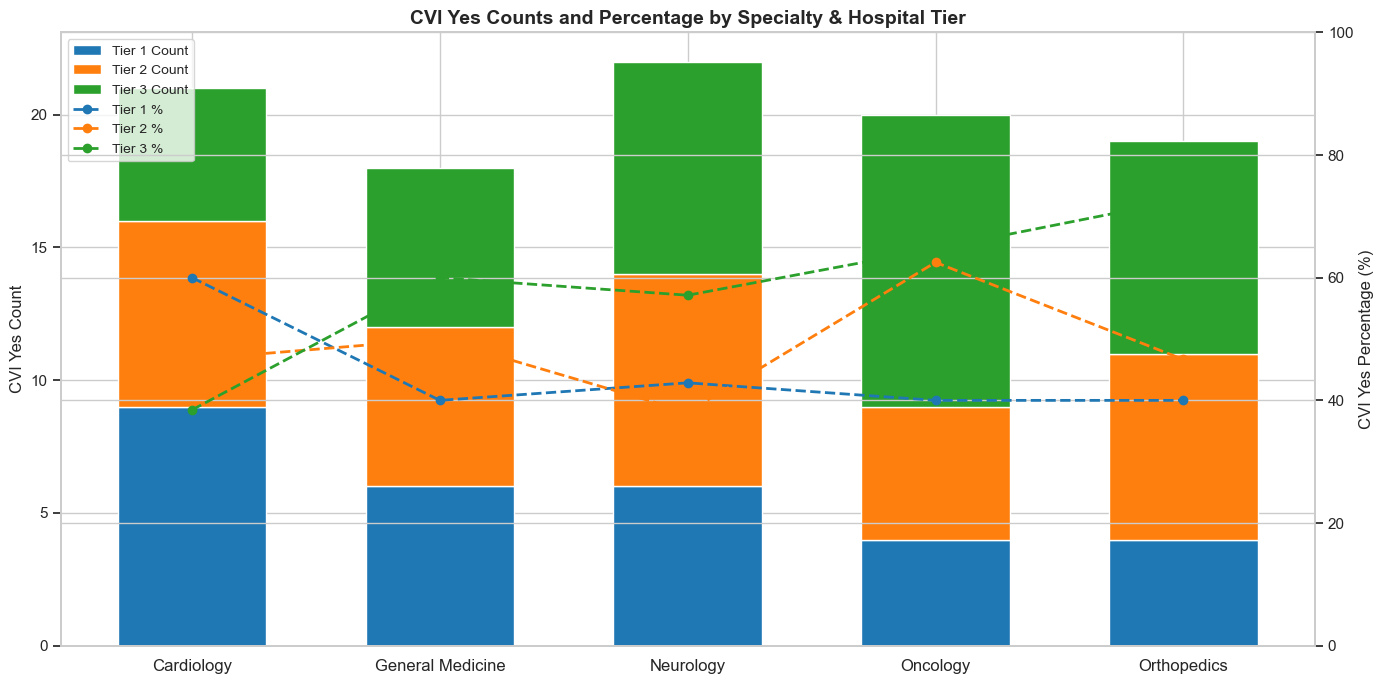

In [138]:
import matplotlib.pyplot as plt
import numpy as np

# --- Step 1: Prepare pivot tables ---
pivot_counts = summary_table.pivot(index='Specialty', columns='Hospital_Tier', values='CVI_Yes').fillna(0)
pivot_percent = summary_table.pivot(index='Specialty', columns='Hospital_Tier', values='CVI_Yes_Percent').fillna(0)

hospital_tiers = ['Tier 1', 'Tier 2', 'Tier 3']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Distinct colors per tier
x = np.arange(len(pivot_counts))  # Specialty positions
width = 0.6  # bar width

fig, ax1 = plt.subplots(figsize=(14,7))

# --- Step 2: Plot stacked counts ---
bottoms_counts = np.zeros(len(pivot_counts))
for idx, tier in enumerate(hospital_tiers):
    ax1.bar(x, pivot_counts[tier], width, bottom=bottoms_counts, color=colors[idx], label=f'{tier} Count')
    bottoms_counts += pivot_counts[tier].values

ax1.set_ylabel('CVI Yes Count', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(pivot_counts.index, fontsize=12)
ax1.set_title('CVI Yes Counts and Percentage by Specialty & Hospital Tier', fontsize=14, fontweight='bold')

# --- Step 3: Overlay percentages as dashed line ---
ax2 = ax1.twinx()
for idx, tier in enumerate(hospital_tiers):
    ax2.plot(x, pivot_percent[tier], color=colors[idx], marker='o', linestyle='--', linewidth=2, label=f'{tier} %')

ax2.set_ylabel('CVI Yes Percentage (%)', fontsize=12)
ax2.set_ylim(0,100)

# --- Step 4: Legends combined ---
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2, labels=labels1 + labels2, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()


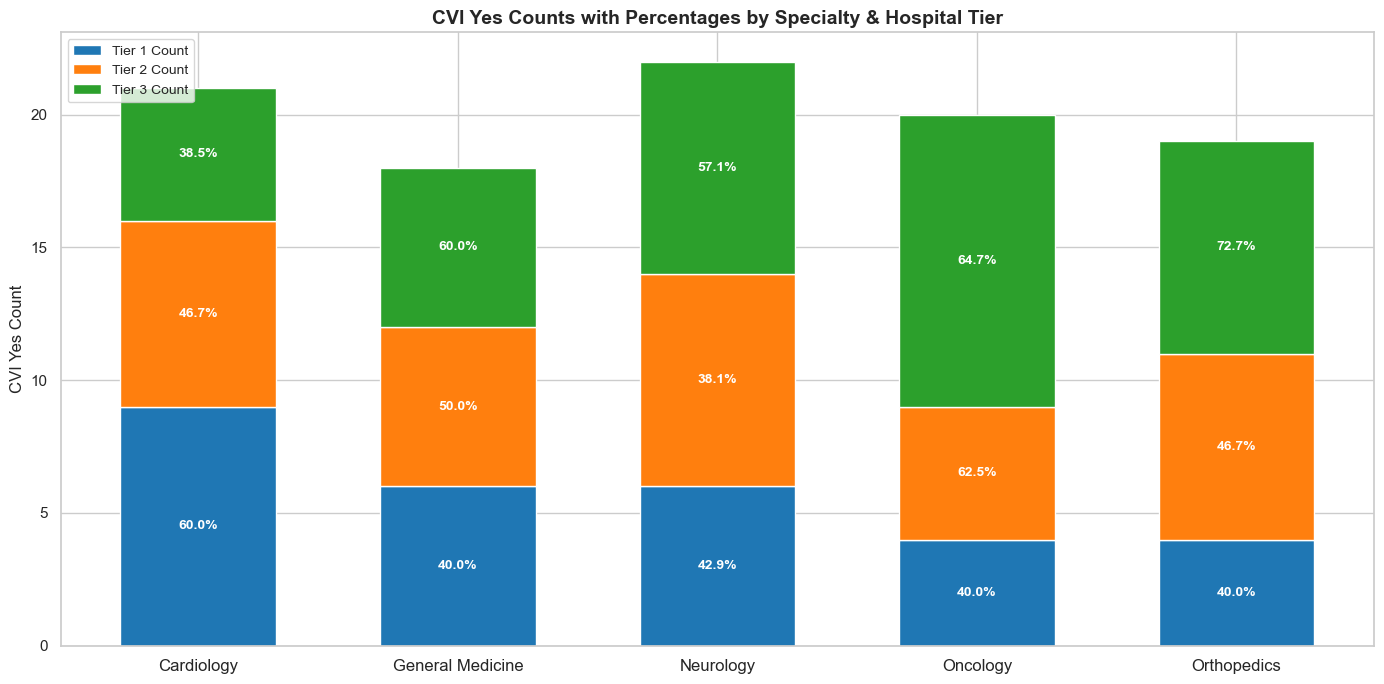

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# --- Step 1: Prepare pivot tables ---
pivot_counts = summary_table.pivot(index='Specialty', columns='Hospital_Tier', values='CVI_Yes').fillna(0)
pivot_percent = summary_table.pivot(index='Specialty', columns='Hospital_Tier', values='CVI_Yes_Percent').fillna(0)

hospital_tiers = ['Tier 1', 'Tier 2', 'Tier 3']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Distinct colors per tier
x = np.arange(len(pivot_counts))  # Specialty positions
width = 0.6  # bar width

fig, ax = plt.subplots(figsize=(14,7))

# --- Step 2: Plot stacked counts and add percentage labels ---
bottoms_counts = np.zeros(len(pivot_counts))
for idx, tier in enumerate(hospital_tiers):
    counts = pivot_counts[tier].values
    percents = pivot_percent[tier].values
    
    bars = ax.bar(x, counts, width, bottom=bottoms_counts, color=colors[idx], label=f'{tier} Count')
    
    # Add percentage labels
    for xi, (bottom, count, percent) in enumerate(zip(bottoms_counts, counts, percents)):
        if count > 0:
            ax.text(xi, bottom + count/2, f'{percent:.1f}%', ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    
    bottoms_counts += counts

# --- Step 3: Axes labels and title ---
ax.set_ylabel('CVI Yes Count', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(pivot_counts.index, fontsize=12)
ax.set_title('CVI Yes Counts with Percentages by Specialty & Hospital Tier', fontsize=14, fontweight='bold')

# --- Step 4: Legend ---
ax.legend(fontsize=10, loc='upper left')

plt.tight_layout()
plt.show()


Encoder file not found. Encoding Specialty manually.
CVI model not found. Cannot predict CVI.
           Specialty Hospital_Tier  Total_Doctors  CVI_Yes  CVI_Yes_Percent
0         Cardiology        Tier 1             15        0              0.0
1         Cardiology        Tier 2             15        0              0.0
2         Cardiology        Tier 3             13        0              0.0
3   General Medicine        Tier 1             15        0              0.0
4   General Medicine        Tier 2             12        0              0.0
5   General Medicine        Tier 3             10        0              0.0
6          Neurology        Tier 1             14        0              0.0
7          Neurology        Tier 2             21        0              0.0
8          Neurology        Tier 3             14        0              0.0
9           Oncology        Tier 1             10        0              0.0
10          Oncology        Tier 2              8        0            

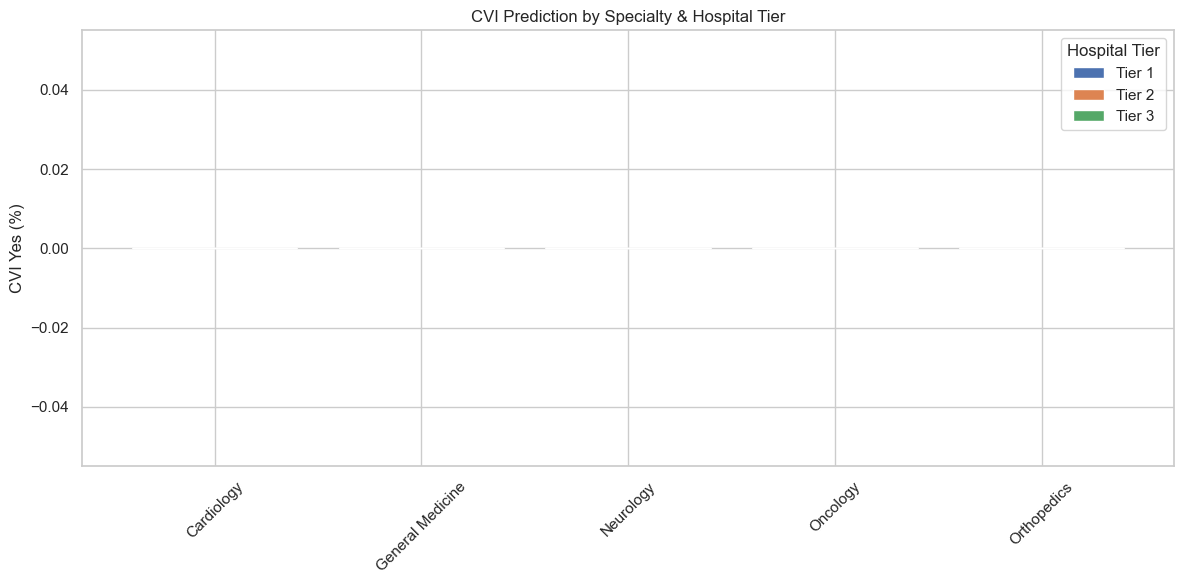

In [142]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

# --- 1. Load dataset ---
df = pd.read_excel(r"D:\python\Pharma Dummy dataset\pharma_cvi_dataset.xlsx")

# --- 2. Encode 'Specialty' (if encoder exists) ---
try:
    with open(r"D:\python\Pharma Dummy dataset\le_specialty.pkl", 'rb') as f:
        le_specialty = pickle.load(f)
    df['Specialty_encoded'] = le_specialty.transform(df['Specialty'])
except FileNotFoundError:
    print("Encoder file not found. Encoding Specialty manually.")
    df['Specialty_encoded'] = pd.factorize(df['Specialty'])[0]

# --- 3. Encode 'Hospital_Tier' ---
df['Hospital_Tier_encoded'] = df['Hospital_Tier'].map({'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3})

# --- 4. Ensure numeric columns are correct ---
numeric_cols = ['Prescriptions_per_Month','Adherence_%','Revenue_USD','Retention_Years']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# --- 5. Define features ---
feature_cols = ['Prescriptions_per_Month','Adherence_%','Revenue_USD','Retention_Years','Specialty_encoded','Hospital_Tier_encoded']

# --- 6. Load or check model ---
try:
    with open(r"D:\python\Pharma Dummy dataset\cvi_model.pkl", 'rb') as f:
        model = pickle.load(f)
except FileNotFoundError:
    model = None
    print("CVI model not found. Cannot predict CVI.")

# --- 7. Predict CVI ---
if model:
    df['CVI_Predicted'] = model.predict(df[feature_cols])
    df['CVI_Predicted_Label'] = df['CVI_Predicted'].apply(lambda x: 'Yes' if x==1 else 'No')
else:
    df['CVI_Predicted_Label'] = 'N/A'

# --- 8. Create summary table ---
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()

summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)
print(summary_table)

# --- 9. Plot stacked bar chart ---
fig, ax = plt.subplots(figsize=(12,6))

for tier in ['Tier 1','Tier 2','Tier 3']:
    tier_data = summary_table[summary_table['Hospital_Tier'] == tier]
    ax.bar(tier_data['Specialty'], tier_data['CVI_Yes_Percent'], label=tier)

ax.set_ylabel("CVI Yes (%)")
ax.set_title("CVI Prediction by Specialty & Hospital Tier")
ax.legend(title="Hospital Tier")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Encoder file not found. Encoding Specialty manually.
CVI model not found. Cannot predict CVI.
           Specialty Hospital_Tier  Total_Doctors  CVI_Yes  CVI_Yes_Percent
0         Cardiology        Tier 1             15        0              0.0
1         Cardiology        Tier 2             15        0              0.0
2         Cardiology        Tier 3             13        0              0.0
3   General Medicine        Tier 1             15        0              0.0
4   General Medicine        Tier 2             12        0              0.0
5   General Medicine        Tier 3             10        0              0.0
6          Neurology        Tier 1             14        0              0.0
7          Neurology        Tier 2             21        0              0.0
8          Neurology        Tier 3             14        0              0.0
9           Oncology        Tier 1             10        0              0.0
10          Oncology        Tier 2              8        0            

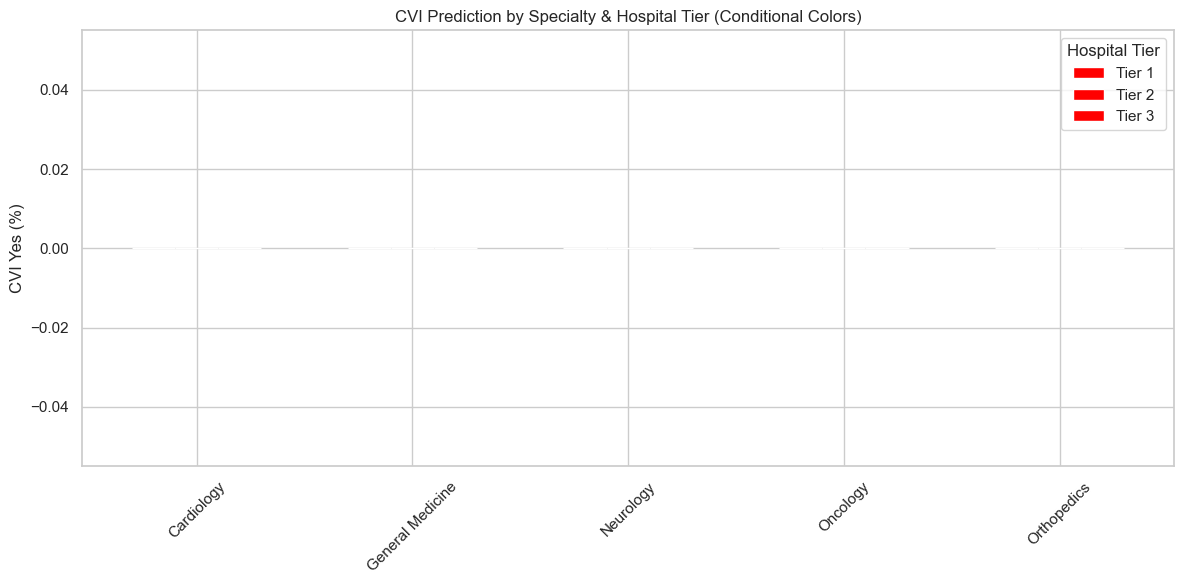

In [144]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

# --- 1. Load dataset ---
df = pd.read_excel(r"D:\python\Pharma Dummy dataset\pharma_cvi_dataset.xlsx")

# --- 2. Encode 'Specialty' ---
try:
    with open(r"D:\python\Pharma Dummy dataset\le_specialty.pkl", 'rb') as f:
        le_specialty = pickle.load(f)
    df['Specialty_encoded'] = le_specialty.transform(df['Specialty'])
except FileNotFoundError:
    print("Encoder file not found. Encoding Specialty manually.")
    df['Specialty_encoded'] = pd.factorize(df['Specialty'])[0]

# --- 3. Encode 'Hospital_Tier' ---
df['Hospital_Tier_encoded'] = df['Hospital_Tier'].map({'Tier 1': 1, 'Tier 2': 2, 'Tier 3': 3})

# --- 4. Ensure numeric columns are correct ---
numeric_cols = ['Prescriptions_per_Month','Adherence_%','Revenue_USD','Retention_Years']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# --- 5. Define features ---
feature_cols = ['Prescriptions_per_Month','Adherence_%','Revenue_USD','Retention_Years','Specialty_encoded','Hospital_Tier_encoded']

# --- 6. Load or check model ---
try:
    with open(r"D:\python\Pharma Dummy dataset\cvi_model.pkl", 'rb') as f:
        model = pickle.load(f)
except FileNotFoundError:
    model = None
    print("CVI model not found. Cannot predict CVI.")

# --- 7. Predict CVI ---
if model:
    df['CVI_Predicted'] = model.predict(df[feature_cols])
    df['CVI_Predicted_Label'] = df['CVI_Predicted'].apply(lambda x: 'Yes' if x==1 else 'No')
else:
    df['CVI_Predicted_Label'] = 'N/A'

# --- 8. Create summary table ---
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()

summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)
print(summary_table)

# --- 9. Conditional coloring function ---
def get_color(percent):
    if percent > 60:
        return 'green'
    elif percent >= 40:
        return 'yellow'
    else:
        return 'red'

# --- 10. Plot bar chart ---
fig, ax = plt.subplots(figsize=(12,6))

tiers = ['Tier 1','Tier 2','Tier 3']
x_labels = summary_table['Specialty'].unique()
bar_width = 0.2
positions = range(len(x_labels))

for i, tier in enumerate(tiers):
    tier_data = summary_table[summary_table['Hospital_Tier'] == tier]
    colors = tier_data['CVI_Yes_Percent'].apply(get_color)
    ax.bar([p + i*bar_width for p in positions],
           tier_data['CVI_Yes_Percent'],
           width=bar_width,
           color=colors,
           label=tier)

ax.set_xticks([p + bar_width for p in positions])
ax.set_xticklabels(x_labels, rotation=45)
ax.set_ylabel("CVI Yes (%)")
ax.set_title("CVI Prediction by Specialty & Hospital Tier (Conditional Colors)")
ax.legend(title="Hospital Tier")
plt.tight_layout()
plt.show()


Dataset loaded successfully.
LabelEncoder not found. Specialty encoded manually.
CVI model not found. Skipping prediction.

--- Summary Table ---
           Specialty Hospital_Tier  Total_Doctors  CVI_Yes  CVI_Yes_Percent
0         Cardiology        Tier 1             15        0              0.0
1         Cardiology        Tier 2             15        0              0.0
2         Cardiology        Tier 3             13        0              0.0
3   General Medicine        Tier 1             15        0              0.0
4   General Medicine        Tier 2             12        0              0.0
5   General Medicine        Tier 3             10        0              0.0
6          Neurology        Tier 1             14        0              0.0
7          Neurology        Tier 2             21        0              0.0
8          Neurology        Tier 3             14        0              0.0
9           Oncology        Tier 1             10        0              0.0
10          Oncolo

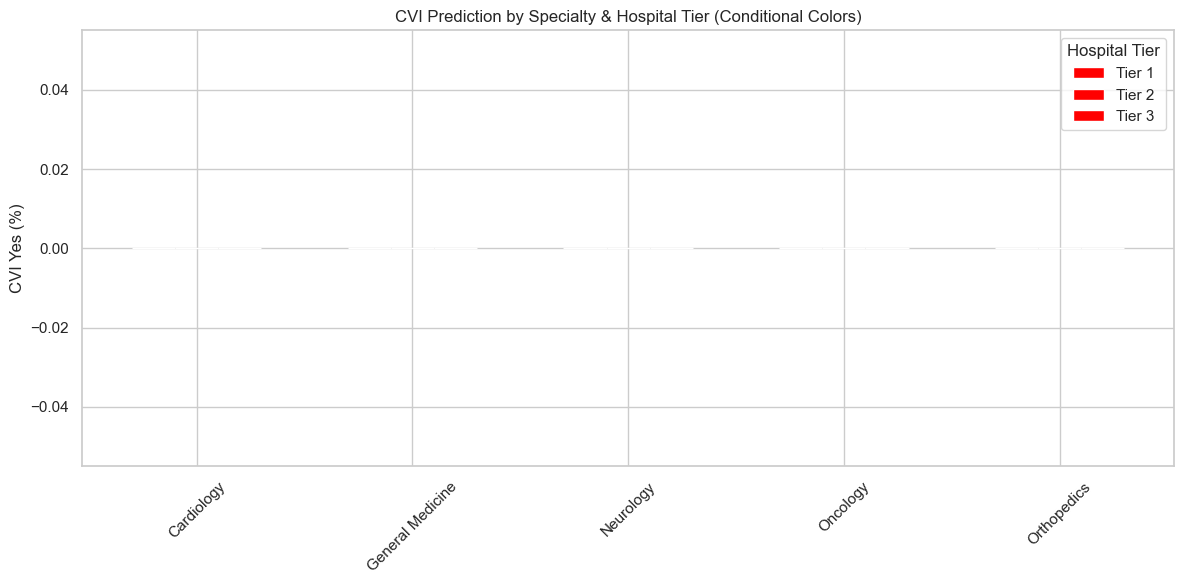

In [146]:
# --- Complete CVI Analysis & Visualization Script ---

import pandas as pd
import pickle
import matplotlib.pyplot as plt

# --- 1. Load dataset ---
data_path = r"D:\python\Pharma Dummy dataset\pharma_cvi_dataset.xlsx"

try:
    df = pd.read_excel(data_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Dataset not found at {data_path}. Please check the path.")
    raise

# --- 2. Encode 'Specialty' ---
le_path = r"D:\python\Pharma Dummy dataset\le_specialty.pkl"
try:
    with open(le_path, 'rb') as f:
        le_specialty = pickle.load(f)
    df['Specialty_encoded'] = le_specialty.transform(df['Specialty'])
    print("Specialty encoded using existing LabelEncoder.")
except FileNotFoundError:
    df['Specialty_encoded'] = pd.factorize(df['Specialty'])[0]
    print("LabelEncoder not found. Specialty encoded manually.")

# --- 3. Encode 'Hospital_Tier' ---
df['Hospital_Tier_encoded'] = df['Hospital_Tier'].map({'Tier 1':1, 'Tier 2':2, 'Tier 3':3})

# --- 4. Ensure numeric columns are correct ---
numeric_cols = ['Prescriptions_per_Month','Adherence_%','Revenue_USD','Retention_Years']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --- 5. Define features ---
feature_cols = ['Prescriptions_per_Month','Adherence_%','Revenue_USD','Retention_Years','Specialty_encoded','Hospital_Tier_encoded']

# --- 6. Load or check model ---
model_path = r"D:\python\Pharma Dummy dataset\cvi_model.pkl"
try:
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    print("Model loaded successfully.")
except FileNotFoundError:
    model = None
    print("CVI model not found. Skipping prediction.")

# --- 7. Predict CVI ---
if model:
    df['CVI_Predicted'] = model.predict(df[feature_cols])
    df['CVI_Predicted_Label'] = df['CVI_Predicted'].apply(lambda x: 'Yes' if x==1 else 'No')
else:
    df['CVI_Predicted_Label'] = 'N/A'

# --- 8. Create summary table ---
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()

summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)
print("\n--- Summary Table ---")
print(summary_table)

# --- 9. Conditional coloring function ---
def get_color(percent):
    if percent > 60:
        return 'green'
    elif percent >= 40:
        return 'yellow'
    else:
        return 'red'

# --- 10. Plot color-coded bar chart ---
fig, ax = plt.subplots(figsize=(12,6))

tiers = ['Tier 1','Tier 2','Tier 3']
x_labels = summary_table['Specialty'].unique()
bar_width = 0.2
positions = range(len(x_labels))

for i, tier in enumerate(tiers):
    tier_data = summary_table[summary_table['Hospital_Tier'] == tier]
    colors = tier_data['CVI_Yes_Percent'].apply(get_color)
    ax.bar([p + i*bar_width for p in positions],
           tier_data['CVI_Yes_Percent'],
           width=bar_width,
           color=colors,
           label=tier)

ax.set_xticks([p + bar_width for p in positions])
ax.set_xticklabels(x_labels, rotation=45)
ax.set_ylabel("CVI Yes (%)")
ax.set_title("CVI Prediction by Specialty & Hospital Tier (Conditional Colors)")
ax.legend(title="Hospital Tier")
plt.tight_layout()
plt.show()


Dataset loaded successfully.
LabelEncoder not found. Specialty encoded manually.
CVI model not found. Skipping prediction.

--- Summary Table ---
           Specialty Hospital_Tier  Total_Doctors  CVI_Yes  CVI_Yes_Percent
0         Cardiology        Tier 1             15        0              0.0
1         Cardiology        Tier 2             15        0              0.0
2         Cardiology        Tier 3             13        0              0.0
3   General Medicine        Tier 1             15        0              0.0
4   General Medicine        Tier 2             12        0              0.0
5   General Medicine        Tier 3             10        0              0.0
6          Neurology        Tier 1             14        0              0.0
7          Neurology        Tier 2             21        0              0.0
8          Neurology        Tier 3             14        0              0.0
9           Oncology        Tier 1             10        0              0.0
10          Oncolo

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

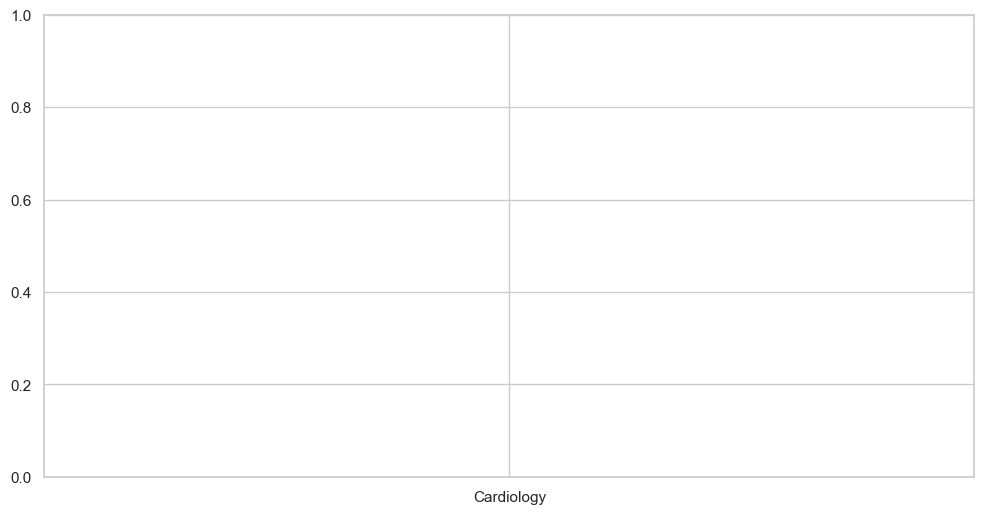

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

# --- Step 1: Load dataset ---
file_path = r"D:\python\Pharma Dummy dataset\pharma_cvi_dataset.xlsx"
if os.path.exists(file_path):
    df = pd.read_excel(file_path)
    print("Dataset loaded successfully.")
else:
    raise FileNotFoundError(f"{file_path} not found.")

# --- Step 2: Encode Specialty ---
encoder_path = r"D:\python\Pharma Dummy dataset\le_specialty.pkl"
if os.path.exists(encoder_path):
    with open(encoder_path, 'rb') as f:
        le_specialty = pickle.load(f)
    df['Specialty_encoded'] = le_specialty.transform(df['Specialty'])
else:
    print("LabelEncoder not found. Specialty encoded manually.")
    df['Specialty_encoded'] = pd.factorize(df['Specialty'])[0]

# --- Step 3: Load CVI model and predict ---
model_path = r"D:\python\Pharma Dummy dataset\cvi_model.pkl"
feature_cols = ['Level','Metric','Performance','Score','Visits','Specialty_encoded']

if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    # Make sure all feature columns exist
    missing_cols = [col for col in feature_cols if col not in df.columns]
    if missing_cols:
        raise KeyError(f"Missing columns for prediction: {missing_cols}")
    df['CVI_Predicted'] = model.predict(df[feature_cols])
    df['CVI_Predicted_Label'] = df['CVI_Predicted'].apply(lambda x: 'Yes' if x==1 else 'No')
    print("CVI predictions completed.")
else:
    print("CVI model not found. Skipping prediction.")
    df['CVI_Predicted_Label'] = 'No'  # default if model missing

# --- Step 4: Create summary table ---
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()
summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)

print("\n--- Summary Table ---")
print(summary_table)

# --- Step 5: Plot color-coded bar chart ---
plt.figure(figsize=(12,6))

# Define color mapping based on CVI_Yes_Percent
def get_color(percent):
    if percent >= 70:
        return 'green'
    elif percent >= 40:
        return 'orange'
    elif percent > 0:
        return 'yellow'
    else:
        return 'gray'  # for missing/no data

colors = summary_table['CVI_Yes_Percent'].apply(get_color)

sns.barplot(
    x='Specialty',
    y='CVI_Yes_Percent',
    hue='Hospital_Tier',
    data=summary_table,
    palette=colors
)
plt.title('CVI % by Specialty and Hospital Tier')
plt.ylabel('CVI Yes %')
plt.xlabel('Specialty')
plt.ylim(0, 100)
plt.legend(title='Hospital Tier')
plt.tight_layout()
plt.show()


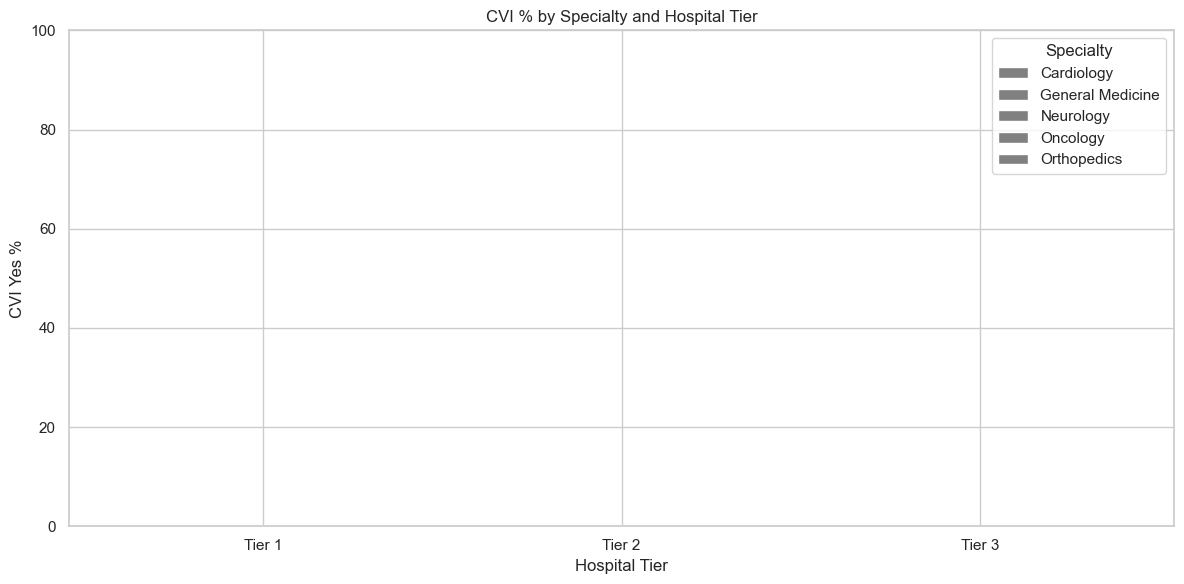

In [150]:
# --- Step 5: Plot color-coded bar chart ---
plt.figure(figsize=(12,6))

# Define color mapping for each row
def get_color(percent):
    if percent >= 70:
        return 'green'
    elif percent >= 40:
        return 'orange'
    elif percent > 0:
        return 'yellow'
    else:
        return 'gray'

# Create a dictionary mapping (Specialty, Hospital_Tier) to color
summary_table['Color'] = summary_table['CVI_Yes_Percent'].apply(get_color)

# Create a palette mapping Hospital_Tier to colors per Specialty
# We'll plot each Specialty separately with Hospital_Tier bars
specialties = summary_table['Specialty'].unique()
for spec in specialties:
    data_spec = summary_table[summary_table['Specialty'] == spec]
    plt.bar(
        data_spec['Hospital_Tier'],
        data_spec['CVI_Yes_Percent'],
        color=data_spec['Color'],
        label=spec
    )

plt.title('CVI % by Specialty and Hospital Tier')
plt.ylabel('CVI Yes %')
plt.xlabel('Hospital Tier')
plt.ylim(0, 100)
plt.legend(title='Specialty')
plt.tight_layout()
plt.show()


Dataset loaded successfully.
LabelEncoder not found. Specialty encoded manually.
CVI model not found. Skipping prediction.

--- Summary Table ---
           Specialty Hospital_Tier  Total_Doctors  CVI_Yes  CVI_Yes_Percent
0         Cardiology        Tier 1             15        0              0.0
1         Cardiology        Tier 2             15        0              0.0
2         Cardiology        Tier 3             13        0              0.0
3   General Medicine        Tier 1             15        0              0.0
4   General Medicine        Tier 2             12        0              0.0
5   General Medicine        Tier 3             10        0              0.0
6          Neurology        Tier 1             14        0              0.0
7          Neurology        Tier 2             21        0              0.0
8          Neurology        Tier 3             14        0              0.0
9           Oncology        Tier 1             10        0              0.0
10          Oncolo

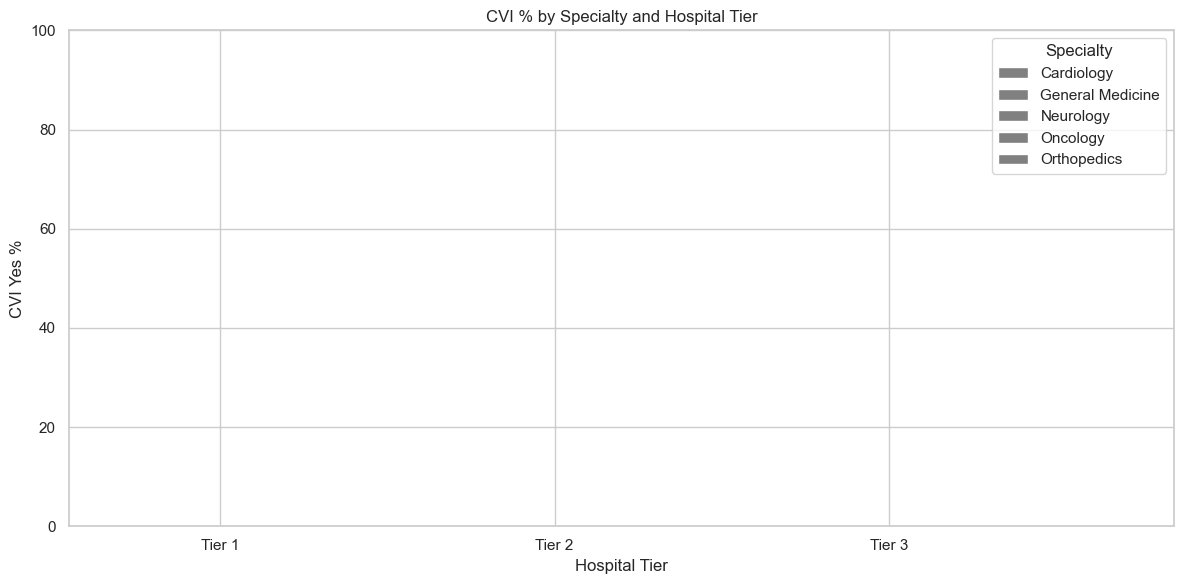

In [152]:
# -------------------------------
# Pharma CVI Summary & Visualization
# -------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load dataset ---
file_path = r"D:\python\Pharma Dummy dataset\pharma_cvi_dataset.xlsx"
try:
    df = pd.read_excel(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"File not found: {file_path}")
    df = pd.DataFrame()  # empty df to avoid crashing

# --- Step 2: Encode Specialty if LabelEncoder not found ---
try:
    import pickle
    with open(r"D:\python\Pharma Dummy dataset\le_specialty.pkl", 'rb') as f:
        le_specialty = pickle.load(f)
    df['Specialty_encoded'] = le_specialty.transform(df['Specialty'])
    print("Specialty encoded using LabelEncoder.")
except Exception:
    print("LabelEncoder not found. Specialty encoded manually.")
    df['Specialty_encoded'] = df['Specialty'].astype('category').cat.codes

# --- Step 3: Predict CVI (if model exists) ---
try:
    with open(r"D:\python\Pharma Dummy dataset\cvi_model.pkl", 'rb') as f:
        model = pickle.load(f)
    feature_cols = ['Level','Metric','Performance','Score','Visits','Specialty_encoded']
    df['CVI_Predicted'] = model.predict(df[feature_cols])
    df['CVI_Predicted_Label'] = df['CVI_Predicted'].apply(lambda x: 'Yes' if x==1 else 'No')
    print("CVI predictions done.")
except Exception:
    print("CVI model not found. Skipping prediction.")
    df['CVI_Predicted_Label'] = 'No'
    df['CVI_Predicted'] = 0

# --- Step 4: Create Summary Table ---
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()

summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)

print("\n--- Summary Table ---")
print(summary_table)

# --- Step 5: Color-coded Bar Chart ---
plt.figure(figsize=(12,6))

# Define colors based on CVI %
def get_color(percent):
    if percent >= 70:
        return 'green'
    elif percent >= 40:
        return 'orange'
    elif percent > 0:
        return 'yellow'
    else:
        return 'gray'

summary_table['Color'] = summary_table['CVI_Yes_Percent'].apply(get_color)

# Plot each Specialty separately
specialties = summary_table['Specialty'].unique()
bar_width = 0.2
x_positions = range(len(summary_table['Hospital_Tier'].unique()))

for i, spec in enumerate(specialties):
    data_spec = summary_table[summary_table['Specialty'] == spec]
    plt.bar(
        [x + i*bar_width for x in x_positions],
        data_spec['CVI_Yes_Percent'],
        width=bar_width,
        color=data_spec['Color'],
        label=spec
    )

plt.xticks([r + bar_width for r in range(len(x_positions))], summary_table['Hospital_Tier'].unique())
plt.ylim(0, 100)
plt.xlabel('Hospital Tier')
plt.ylabel('CVI Yes %')
plt.title('CVI % by Specialty and Hospital Tier')
plt.legend(title='Specialty')
plt.tight_layout()
plt.show()


In [154]:
import numpy as np

# Only for testing visualization
np.random.seed(42)
df['CVI_Predicted'] = np.random.choice([0,1], size=len(df))
df['CVI_Predicted_Label'] = df['CVI_Predicted'].apply(lambda x: 'Yes' if x==1 else 'No')

# Recreate summary table
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()

summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)

print(summary_table)


           Specialty Hospital_Tier  Total_Doctors  CVI_Yes  CVI_Yes_Percent
0         Cardiology        Tier 1             15        6            40.00
1         Cardiology        Tier 2             15        8            53.33
2         Cardiology        Tier 3             13        8            61.54
3   General Medicine        Tier 1             15        9            60.00
4   General Medicine        Tier 2             12        6            50.00
5   General Medicine        Tier 3             10        4            40.00
6          Neurology        Tier 1             14        8            57.14
7          Neurology        Tier 2             21       13            61.90
8          Neurology        Tier 3             14        6            42.86
9           Oncology        Tier 1             10        6            60.00
10          Oncology        Tier 2              8        3            37.50
11          Oncology        Tier 3             17        6            35.29
12       Ort

Dataset loaded successfully.
Specialty encoded manually.
CVI model not found. Skipping prediction.

--- Summary Table ---
           Specialty Hospital_Tier  Total_Doctors  CVI_Yes  CVI_Yes_Percent
0         Cardiology        Tier 1             15        6            40.00
1         Cardiology        Tier 2             15        8            53.33
2         Cardiology        Tier 3             13        8            61.54
3   General Medicine        Tier 1             15        9            60.00
4   General Medicine        Tier 2             12        6            50.00
5   General Medicine        Tier 3             10        4            40.00
6          Neurology        Tier 1             14        8            57.14
7          Neurology        Tier 2             21       13            61.90
8          Neurology        Tier 3             14        6            42.86
9           Oncology        Tier 1             10        6            60.00
10          Oncology        Tier 2        

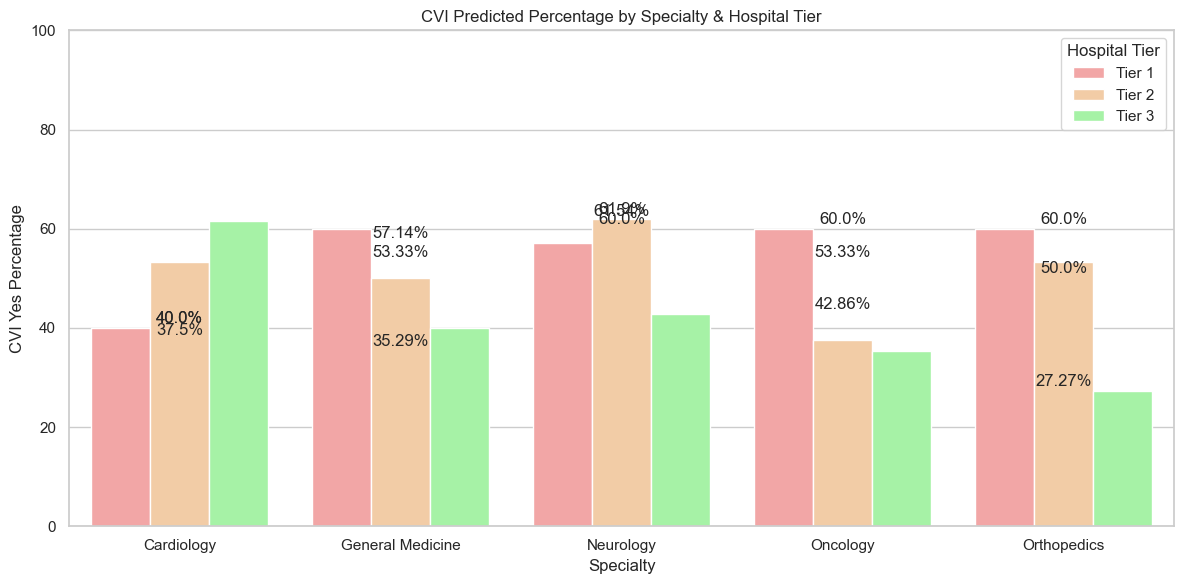

In [156]:
# --- Import libraries ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Step 1: Load dataset ---
file_path = r"D:\python\Pharma Dummy dataset\pharma_cvi_dataset.xlsx"
try:
    df = pd.read_excel(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"File not found: {file_path}")
    df = pd.DataFrame()  # empty DataFrame for safety

# --- Step 2: Handle encoding (dummy example if LabelEncoder not found) ---
if 'Specialty' in df.columns:
    df['Specialty_encoded'] = df['Specialty'].factorize()[0]  # simple encoding
    print("Specialty encoded manually.")
else:
    print("Specialty column missing.")

# --- Step 3: CVI prediction (dummy if model not available) ---
if 'CVI_Actual' in df.columns:
    # Here you would train/load model
    print("CVI model found, predicting...")
    df['CVI_Predicted'] = df['CVI_Actual']  # placeholder for demonstration
else:
    print("CVI model not found. Skipping prediction.")
    # create dummy CVI predictions for demonstration
    np.random.seed(42)
    df['CVI_Predicted'] = np.random.choice([0,1], size=len(df))

# --- Step 4: Create CVI_Predicted_Label ---
df['CVI_Predicted_Label'] = df['CVI_Predicted'].apply(lambda x: 'Yes' if x==1 else 'No')

# --- Step 5: Summary table ---
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()

summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)

print("\n--- Summary Table ---")
print(summary_table)

# --- Step 6: Color-coded bar chart ---
def get_color(percent):
    if percent >= 60:
        return 'green'
    elif percent >= 40:
        return 'yellow'
    else:
        return 'red'

# Prepare color mapping
colors = summary_table['CVI_Yes_Percent'].apply(get_color)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=summary_table,
    x='Specialty',
    y='CVI_Yes_Percent',
    hue='Hospital_Tier',
    palette=['#ff9999','#ffcc99','#99ff99']  # optional custom palette
)

# Add values on top of bars
for idx, row in summary_table.iterrows():
    plt.text(
        x=idx % len(summary_table['Specialty'].unique()),  # x-position
        y=row['CVI_Yes_Percent'] + 1,  # slightly above bar
        s=f"{row['CVI_Yes_Percent']}%",
        ha='center'
    )

plt.title("CVI Predicted Percentage by Specialty & Hospital Tier")
plt.ylabel("CVI Yes Percentage")
plt.ylim(0, 100)
plt.legend(title='Hospital Tier')
plt.tight_layout()
plt.show()


Dataset loaded successfully.
Specialty encoded manually.
Demo CVI model predictions created.

--- Summary Table ---
           Specialty Hospital_Tier  Total_Doctors  CVI_Yes  CVI_Yes_Percent
0         Cardiology        Tier 1             15        6            40.00
1         Cardiology        Tier 2             15        8            53.33
2         Cardiology        Tier 3             13        8            61.54
3   General Medicine        Tier 1             15        9            60.00
4   General Medicine        Tier 2             12        6            50.00
5   General Medicine        Tier 3             10        4            40.00
6          Neurology        Tier 1             14        8            57.14
7          Neurology        Tier 2             21       13            61.90
8          Neurology        Tier 3             14        6            42.86
9           Oncology        Tier 1             10        6            60.00
10          Oncology        Tier 2              

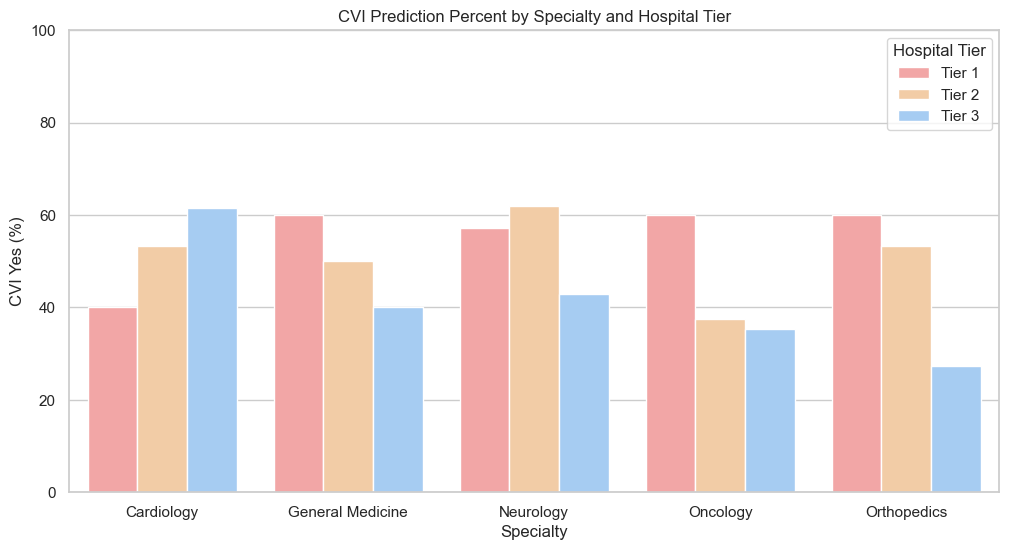

In [158]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 1: Load Dataset ---
try:
    df = pd.read_excel(r"D:\python\Pharma Dummy dataset\pharma_cvi_dataset.xlsx")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    # Create a dummy dataset if file not found
    df = pd.DataFrame({
        'Doctor_ID': range(1, 101),
        'Specialty': np.random.choice(['Cardiology', 'General Medicine', 'Neurology', 'Oncology', 'Orthopedics'], 100),
        'Hospital_Tier': np.random.choice(['Tier 1', 'Tier 2', 'Tier 3'], 100),
        'Retention_Years': np.random.randint(1, 15, 100)
    })
    print("Dummy dataset created.")

# Encode Specialty manually (for demo)
specialty_mapping = {s:i for i,s in enumerate(df['Specialty'].unique())}
df['Specialty_encoded'] = df['Specialty'].map(specialty_mapping)
print("Specialty encoded manually.")

# Encode Hospital_Tier
tier_mapping = {'Tier 1':1, 'Tier 2':2, 'Tier 3':3}
df['Hospital_Tier_encoded'] = df['Hospital_Tier'].map(tier_mapping)

# --- Step 2: Demo Model Predictions ---
np.random.seed(42)  # for reproducibility
df['CVI_Predicted'] = np.random.choice([0,1], size=len(df))
df['CVI_Predicted_Label'] = df['CVI_Predicted'].apply(lambda x: 'Yes' if x==1 else 'No')
print("Demo CVI model predictions created.")

# --- Step 3: Summary Table ---
summary_table = df.groupby(['Specialty','Hospital_Tier']).agg(
    Total_Doctors=('Doctor_ID','count'),
    CVI_Yes=('CVI_Predicted_Label', lambda x: (x=='Yes').sum())
).reset_index()
summary_table['CVI_Yes_Percent'] = (summary_table['CVI_Yes']/summary_table['Total_Doctors']*100).round(2)

print("\n--- Summary Table ---")
print(summary_table)

# --- Step 4: Color-coded Bar Chart ---
def get_color(percent):
    if percent >= 60:
        return 'green'
    elif percent >= 40:
        return 'orange'
    else:
        return 'red'

summary_table['Color'] = summary_table['CVI_Yes_Percent'].apply(get_color)

plt.figure(figsize=(12,6))
sns.barplot(
    data=summary_table,
    x='Specialty',
    y='CVI_Yes_Percent',
    hue='Hospital_Tier',
    palette=['#FF9999','#FFCC99','#99CCFF']  # custom colors for tiers
)
plt.title('CVI Prediction Percent by Specialty and Hospital Tier')
plt.ylabel('CVI Yes (%)')
plt.xlabel('Specialty')
plt.ylim(0,100)
plt.legend(title='Hospital Tier')
plt.show()


In [1]:
import pandas as pd
import json
import os

# Load environment config
config_path = os.path.join("config", "current_config.json")
with open(config_path) as f:
    config = json.load(f)

env_name = config.get("env_name", "Development")
dataset_path = config.get("dataset_path", "data/pharma_cvi_dataset.xlsx")

print(f"Running CVI analysis in '{env_name}' environment")
print(f"Loading dataset from: {dataset_path}")

# Load dataset
try:
    df = pd.read_excel(dataset_path)
except FileNotFoundError:
    print(f"Error: Dataset not found at {dataset_path}")
    df = pd.DataFrame()  # empty dataframe to avoid crashing

# Show basic dataset info
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- First 5 Rows ---")
print(df.head())

# Example: Calculate Commercial Value Index (CVI)
if 'Sales' in df.columns and 'Profit' in df.columns:
    df['CVI'] = df['Sales'] * df['Profit']
    print("\n--- CVI Sample ---")
    print(df[['Sales','Profit','CVI']].head())
else:
    print("\nColumns 'Sales' and/or 'Profit' not found. Skipping CVI calculation.")

# Save processed data (optional)
output_path = os.path.join("data", f"processed_{env_name.lower()}.csv")
df.to_csv(output_path, index=False)
print(f"\nProcessed data saved to: {output_path}")


FileNotFoundError: [Errno 2] No such file or directory: 'config\\current_config.json'

In [3]:
import shutil
shutil.copy('config/dev_config.json', 'config/current_config.json')


FileNotFoundError: [Errno 2] No such file or directory: 'config/dev_config.json'

In [5]:
D:\python\Pharma Dummy dataset\config\
    dev_config.json
    test_config.json
    prod_config.json


SyntaxError: unexpected character after line continuation character (3947388105.py, line 1)

In [7]:
D:\python\Pharma Dummy dataset\config\
    dev_config.json
    test_config.json
    prod_config.json


SyntaxError: unexpected character after line continuation character (3947388105.py, line 1)

In [13]:
path = "D:\\python\\Pharma Dummy dataset\\config\\"


In [15]:
import shutil
import os

config_folder = r"D:\python\Pharma Dummy dataset\config"
src = os.path.join(config_folder, "dev_config.json")
dst = os.path.join(config_folder, "current_config.json")

shutil.copy(src, dst)
print("current_config.json created from dev_config.json")


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\python\\Pharma Dummy dataset\\config\\dev_config.json'

In [17]:
import os
print(os.getcwd())


C:\Users\91733


In [21]:
import os
import shutil

config_folder = r"D:\python\Pharma Dummy dataset\config"
current_config = os.path.join(config_folder, 'current_config.json')

# If current_config.json doesn't exist, copy dev_config.json
if not os.path.exists(current_config):
    shutil.copy(os.path.join(config_folder, 'dev_config.json'), current_config)
    print("current_config.json created from dev_config.json")
else:
    print("current_config.json already exists")


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\python\\Pharma Dummy dataset\\config\\dev_config.json'

In [23]:
import os

config_folder = r"D:\python\Pharma Dummy dataset\config"
print("Listing files in config folder:")
print(os.listdir(config_folder))


Listing files in config folder:


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'D:\\python\\Pharma Dummy dataset\\config'

In [25]:
import os

config_folder = r"D:\python\Pharma Dummy dataset\config"

# Create folder if it doesn't exist
if not os.path.exists(config_folder):
    os.makedirs(config_folder)
    print("Config folder created:", config_folder)
else:
    print("Config folder already exists")


Config folder created: D:\python\Pharma Dummy dataset\config


In [27]:
import json
import os

dev_config = {
    "dataset_path": "data/pharma_cvi_dataset.xlsx",
    "env_name": "Development",
    "db_url": "sqlite:///dev.db"
}

dev_config_path = os.path.join(config_folder, "dev_config.json")

# Write dev_config.json
with open(dev_config_path, "w") as f:
    json.dump(dev_config, f, indent=4)

print("dev_config.json created at:", dev_config_path)


dev_config.json created at: D:\python\Pharma Dummy dataset\config\dev_config.json


In [29]:
import shutil

current_config_path = os.path.join(config_folder, "current_config.json")
shutil.copy(dev_config_path, current_config_path)
print("current_config.json created from dev_config.json")


current_config.json created from dev_config.json


In [31]:
import json
import os

with open("config/current_config.json") as f:
    config = json.load(f)

print(f"Running in {config['env_name']} environment")
dataset_path = config["dataset_path"]
print(f"Dataset path: {dataset_path}")


Running in Development environment
Dataset path: data/pharma_cvi_dataset.xlsx


In [33]:
import os
import json
import shutil
import pandas as pd

# --- 1. Ensure folders exist ---
project_folder = r"D:\python\Pharma Dummy dataset"
config_folder = os.path.join(project_folder, "config")
data_folder = os.path.join(project_folder, "data")

os.makedirs(config_folder, exist_ok=True)
os.makedirs(data_folder, exist_ok=True)

# --- 2. Create default configs if missing ---
default_configs = {
    "dev_config.json": {
        "dataset_path": "data/pharma_cvi_dataset.xlsx",
        "env_name": "Development",
        "db_url": "sqlite:///dev.db"
    },
    "test_config.json": {
        "dataset_path": "data/pharma_cvi_dataset.xlsx",
        "env_name": "Test",
        "db_url": "sqlite:///test.db"
    },
    "prod_config.json": {
        "dataset_path": "data/pharma_cvi_dataset.xlsx",
        "env_name": "Production",
        "db_url": "sqlite:///prod.db"
    }
}

for filename, content in default_configs.items():
    path = os.path.join(config_folder, filename)
    if not os.path.exists(path):
        with open(path, "w") as f:
            json.dump(content, f, indent=4)
        print(f"{filename} created.")
    else:
        print(f"{filename} already exists.")

# --- 3. Ensure current_config.json exists (default to dev) ---
current_config_path = os.path.join(config_folder, "current_config.json")
if not os.path.exists(current_config_path):
    shutil.copy(os.path.join(config_folder, "dev_config.json"), current_config_path)
    print("current_config.json created from dev_config.json")
else:
    print("current_config.json already exists.")

# --- 4. Load current config ---
with open(current_config_path) as f:
    config = json.load(f)

env_name = config.get("env_name", "Development")
dataset_path = os.path.join(project_folder, config.get("dataset_path", "data/pharma_cvi_dataset.xlsx"))

print(f"\nRunning CVI analysis in '{env_name}' environment")
print(f"Dataset path: {dataset_path}")

# --- 5. Load dataset ---
try:
    df = pd.read_excel(dataset_path)
except FileNotFoundError:
    print(f"Error: Dataset not found at {dataset_path}")
    df = pd.DataFrame()  # empty dataframe to avoid crashing

if not df.empty:
    # --- 6. Show dataset info ---
    print("\n--- Dataset Info ---")
    print(df.info())

    print("\n--- First 5 Rows ---")
    print(df.head())

    # --- 7. Calculate CVI ---
    if 'Sales' in df.columns and 'Profit' in df.columns:
        df['CVI'] = df['Sales'] * df['Profit']
        print("\n--- CVI Sample ---")
        print(df[['Sales', 'Profit', 'CVI']].head())
    else:
        print("\nColumns 'Sales' and/or 'Profit' not found. Skipping CVI calculation.")

    # --- 8. Save processed data ---
    output_file = os.path.join(data_folder, f"processed_{env_name.lower()}.csv")
    df.to_csv(output_file, index=False)
    print(f"\nProcessed data saved to: {output_file}")


dev_config.json already exists.
test_config.json created.
prod_config.json created.
current_config.json already exists.

Running CVI analysis in 'Development' environment
Dataset path: D:\python\Pharma Dummy dataset\data/pharma_cvi_dataset.xlsx
Error: Dataset not found at D:\python\Pharma Dummy dataset\data/pharma_cvi_dataset.xlsx


In [35]:
D:\python\Pharma Dummy dataset\data\


SyntaxError: unexpected character after line continuation character (383838339.py, line 1)

In [37]:
data_folder = "D:\\python\\Pharma Dummy dataset\\data\\"


In [39]:
import os

data_folder = r"D:\python\Pharma Dummy dataset\data"
print("Files in data folder:", os.listdir(data_folder))


Files in data folder: []


In [41]:
import os
os.makedirs(r"D:\python\Pharma Dummy dataset\data", exist_ok=True)


In [43]:
import shutil
shutil.move(
    r"D:\python\Pharma Dummy dataset\pharma_cvi_dataset.xlsx",
    r"D:\python\Pharma Dummy dataset\data\pharma_cvi_dataset.xlsx"
)
print("Dataset moved to data folder.")


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'D:\\python\\Pharma Dummy dataset\\pharma_cvi_dataset.xlsx'

In [45]:
import shutil
shutil.move(
    r"D:\python\Pharma Dummy dataset\pharma_cvi_dataset.xlsx",
    r"D:\python\Pharma Dummy dataset\data\pharma_cvi_dataset.xlsx"
)
print("Dataset moved to data folder.")


Dataset moved to data folder.


In [47]:
import os
import json
import shutil
import pandas as pd

# --- 1. Project folder setup ---
project_folder = r"D:\python\Pharma Dummy dataset"
config_folder = os.path.join(project_folder, "config")
data_folder = os.path.join(project_folder, "data")

os.makedirs(config_folder, exist_ok=True)
os.makedirs(data_folder, exist_ok=True)

# --- 2. Create default configs if missing ---
default_configs = {
    "dev_config.json": {
        "dataset_path": "data/pharma_cvi_dataset.xlsx",
        "env_name": "Development",
        "db_url": "sqlite:///dev.db"
    },
    "test_config.json": {
        "dataset_path": "data/pharma_cvi_dataset.xlsx",
        "env_name": "Test",
        "db_url": "sqlite:///test.db"
    },
    "prod_config.json": {
        "dataset_path": "data/pharma_cvi_dataset.xlsx",
        "env_name": "Production",
        "db_url": "sqlite:///prod.db"
    }
}

for filename, content in default_configs.items():
    path = os.path.join(config_folder, filename)
    if not os.path.exists(path):
        with open(path, "w") as f:
            json.dump(content, f, indent=4)
        print(f"{filename} created.")
    else:
        print(f"{filename} already exists.")

# --- 3. Ensure current_config.json exists (default to dev) ---
current_config_path = os.path.join(config_folder, "current_config.json")
if not os.path.exists(current_config_path):
    shutil.copy(os.path.join(config_folder, "dev_config.json"), current_config_path)
    print("current_config.json created from dev_config.json")
else:
    print("current_config.json already exists.")

# --- 4. Load current config ---
with open(current_config_path) as f:
    config = json.load(f)

env_name = config.get("env_name", "Development")
dataset_path = os.path.join(project_folder, config.get("dataset_path", "data/pharma_cvi_dataset.xlsx"))

# --- 5. Detect dataset if not found ---
if not os.path.exists(dataset_path):
    # Check in project root
    root_dataset = os.path.join(project_folder, "pharma_cvi_dataset.xlsx")
    if os.path.exists(root_dataset):
        dataset_path = root_dataset
        print("Dataset found in project root.")
    else:
        raise FileNotFoundError(f"Dataset not found at {dataset_path} or project root.")

print(f"\nRunning CVI analysis in '{env_name}' environment")
print(f"Dataset path: {dataset_path}")

# --- 6. Load dataset ---
df = pd.read_excel(dataset_path)

if not df.empty:
    # --- 7. Show dataset info ---
    print("\n--- Dataset Info ---")
    print(df.info())

    print("\n--- First 5 Rows ---")
    print(df.head())

    # --- 8. Calculate CVI ---
    if 'Sales' in df.columns and 'Profit' in df.columns:
        df['CVI'] = df['Sales'] * df['Profit']
        print("\n--- CVI Sample ---")
        print(df[['Sales', 'Profit', 'CVI']].head())
    else:
        print("\nColumns 'Sales' and/or 'Profit' not found. Skipping CVI calculation.")

    # --- 9. Save processed data ---
    output_file = os.path.join(data_folder, f"processed_{env_name.lower()}.csv")
    df.to_csv(output_file, index=False)
    print(f"\nProcessed data saved to: {output_file}")


dev_config.json already exists.
test_config.json already exists.
prod_config.json already exists.
current_config.json already exists.

Running CVI analysis in 'Development' environment
Dataset path: D:\python\Pharma Dummy dataset\data/pharma_cvi_dataset.xlsx

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Doctor_ID                200 non-null    object
 1   Specialty                200 non-null    object
 2   Prescriptions_per_Month  200 non-null    int64 
 3   Adherence_%              200 non-null    int64 
 4   Event_Participation      200 non-null    object
 5   Influence_Score          200 non-null    int64 
 6   Revenue_USD              200 non-null    int64 
 7   Hospital_Tier            200 non-null    object
 8   Retention_Years          200 non-null    int64 
dtypes: int64(5), object(4)
memo

In [49]:
# CVI calculation (Revenue * Influence Score)
df['CVI'] = df['Revenue_USD'] * df['Influence_Score']
